### Fill in group number and member names:

In [1]:
GROUP = "3"
NAME1 = "Nils Romanus"
NAME2 = "Måns Karp"

# Optimization for learning - FRTN50

## Assignment 2

The purpose of this assignment is to empirically explore some convergence and implicit regularization properties of the stochastic gradient decent (SGD) method and some of its variants. These properties are mainly explored by considering simple polynomial fitting problems in $\mathbb{R}$ to facilitate easy comparison with known theoretical results and easy visualization. We will also compare the same fitting problem with multi-layer perceptrons also known as fully connected feedforward neural networks.

Below are the tasks that you need to solve. Keep this in mind:
- Carefully motivate every step in your calculations.
- Use figures and tables to motivate your answers.
- Figures must have appropriately labeled axes and must be referenced in the main text.
- Your code should be written in a quite general manner, i.e., if a question is slightly modified, it should only require slight modifications in your code as well. 
- Comment your code well. 
- Make sure you plot in such a way that small quantities are visible. In particular, use log-linear plots, where the quantity that should go to $0$ is on the $y$-axis using logarithmic scale, and the iteration number $k$ on the $x$-axis using linear scale.
- What you need to submit to Canvas:
    - This jupyter notebook containing your solutions.
    - An exported pdf version of the jupyter notebook.

---
### Exercise 1: Polynomial fitting in $\mathbb{R}$ using least squares with a polynomial feature map

Consider fitting the points $\{(x_{i},y_{i})\}_{i=1}^{N}\subseteq\mathbb{R}\times\mathbb{R}$ to a polynomial model $m(\cdot;\theta):\mathbb{R}\rightarrow\mathbb{R}$ using the method of least squares. Here, the model is given by

$$
\begin{align}
    m(x;\theta) = \theta^{T}\phi(x)
\end{align}
$$

where $\theta\in\mathbb{R}^{n+1}$ is the parameter of the model and $\phi:\mathbb{R}\rightarrow\mathbb{R}^{n+1}$ is a polynomial feature map given by

$$
\begin{align}
    \phi(x) = 
    \begin{bmatrix}
    1 \\
    x \\
    \vdots \\
    x^{n}
    \end{bmatrix}
\end{align}
$$
for each $x\in\mathbb{R}$.

I.e. $m(\cdot;\theta)$ is a polynomial (in particular nonlinear) model of degree $n$ and is linear in the parameter $\theta$. If we compare to deep learning, the model $m(\cdot;\theta)$ would have a specific structure but would be nonlinear in the parameter $\theta$ in general.

The method of least squares involves solving the optimization problem

$$
\begin{equation}\label{eq:1}\tag{1}
\begin{aligned}
& \underset{\theta\in\mathbb{R}^{n+1}}{\mathrm{minimize}}
& & \frac{1}{N} \sum_{i=1}^{N}(m(x_{i};\theta) - y_{i})^{2} = \frac{1}{N} \sum_{i=1}^{N}\underbrace{(\theta^{T}\phi(x_{i}) - y_{i})^{2}}_{=f_{i}(\theta)} = \frac{1}{N} \sum_{i=1}^{N}f_{i}(\theta) 
\end{aligned}
\end{equation}
$$

giving an optimal point $\theta^{*}\in\mathbb{R}^{n+1}$, and letting $m(\cdot;\theta^{*})$ be the fitted model. If we let 

$$
\begin{align}
    X = 
    \begin{bmatrix}
    \phi(x_{1})^{T} \\
    \vdots \\
    \phi(x_{N})^{T} 
    \end{bmatrix}\in\mathbb{R}^{N \times (n+1)},  \quad \text{ and } \quad
    Y = 
    \begin{bmatrix}
    y_{1} \\
    \vdots \\
    y_{N}
    \end{bmatrix}\in\mathbb{R}^{N},
\end{align}
$$

optimization problem $\eqref{eq:1}$ can be written as 

$$
\begin{equation}\label{eq:2}\tag{2}
\begin{aligned}
& \underset{\theta\in\mathbb{R}^{n+1}}{\mathrm{minimize}}
& & \frac{1}{N} \left\lVert X\theta - Y \right\rVert_{2}^{2} = f(\theta).
\end{aligned}
\end{equation}
$$

Since the model $m(\cdot;\theta)$ is linear in $\theta$, the function $f$ is convex in $\theta$. This is not the case in deep learning, since the model $m(\cdot;\theta)$ would not be linear in $\theta$ in general.

If the points $x_{i}$ in $\{(x_{i},y_{i})\}_{i=1}^{N}$ are distinct, which is the case in our analysis, it holds that 

$$
\begin{align}
    \text{rank } X = \min(N,n+1).
\end{align}
$$
(See [Vandermonde matrix](https://en.wikipedia.org/wiki/Vandermonde_matrix) for more info.) In particular,
1. if $N < n+1$, optimization problem $\eqref{eq:2}$ is underdetermined, $X X^{T}$ is invertible and there exist $\theta^{*}\in\mathbb{R}^{n+1}$ such that $X\theta^{*} = Y$,
2. if $N > n+1$, optimization problem $\eqref{eq:2}$ is overdetermined and $X^{T} X$ is invertible,
3. if $N = n+1$, both $X X^{T}$ and $X^{T} X$ are invertible and optimization problem $\eqref{eq:2}$ is neither underdetermined nor overdetermined.

You are allowed to assume these facts as given.

---
__a)__ A model is sometimes said to be overparameterized if it has more parameters than data points. By the same token, a model is said to be underparameterized if it has less parameters than data points. 

- Suppose that our model is overparameterized. Which case of 1., 2. and 3. above does this corresponds to? 
- Suppose that our model is underparameterized. Which case of 1., 2. and 3. above does this corresponds to? 

Motivate your answer. It is crucial that you get this right to avoid confusion later.

__Solution:__ 

In our problem, the number of data points is $N$ and the number of parameters are $n + 1$. Hence, if the model is overparameterized we have that $n + 1 > N$, which corresponds to case 1 and that the optimization problem is underdetermined. In the same way we have that when the model is underparameterized we have that $n + 1 < N$, which corresponds to case 2 and an overdetermined optimization problem.

---
__b)__ Find $\nabla f$, $\nabla f_{i}$ and $\nabla^{2}f$.

Carefully motivate your answer.

__Solution:__ 

The gradient of $f(\theta)$ is computed by using the chain rule as shwon in expression \eqref{e1}.
\begin{equation}
    \nabla f(\theta) = \nabla (\frac{1}{N} \lVert X \theta - Y\rVert_2^2)(\theta) = \frac{2X^T}{N}(X\theta - Y)
    \label{e1}
\end{equation}

The gradient of the components of $f(\theta)$, $f_i(\theta_i)$ are computed using the same method as shown in expression \eqref{e2}  
\begin{equation}
    \nabla f_i(\theta_i) = \nabla (\theta^T \phi(x_i)  - y_i)^2)(\theta_i) = 2(\phi(x_i)^T\theta - y_i)\phi(x_i)
    \label{e2}
\end{equation}

And finally the Hessian of $f$ is computed by applying the gradient operator to $\nabla f(\theta)$ as shown in expression \eqref{e3}.

\begin{equation}
    \nabla^2f(\theta) = \nabla (\nabla f)(\theta) = \nabla (\frac{2X^T}{N}(X\theta - Y))(\theta) = \frac{2X^TX}{N}
    \label{e3}
\end{equation} 

---
__c)__ Since $f$ is convex and differentiable, all optimal points $\theta^{*}\in\mathbb{R}^{n+1}$ to the least squares problem are fully characterized by the condition that

$$
\begin{align}
    \nabla f (\theta^{*}) = 0.
\end{align}
$$

Suppose that the least squares problem is underparameterized. 

- Show that there exists a solution $\theta^{*}$
- Conclude that it is unique
- Find a expression for $f(\theta^{*})$

Carefully motivate your answer.

__Solution:__ 

\begin{equation}
    \nabla f(\theta ^{\ast}) = \frac{2X^T}{N}(X\theta^{\ast} - Y) = 0
    \Leftrightarrow
    \theta ^{\ast} = (X^T X)^{-1} X^T Y
    \label{m1}
\end{equation}
Where the inverse in equation \eqref{m1} is well defined since we are in the underparameterized case and can use fact 2 above. Furthermore, the expression for $\theta ^{\ast}$ is unique and hence our solution is unique.


\begin{equation}
    f(\theta^{\ast}) = \frac{1}{N} \lVert X(X^T X)^{-1} X^T Y - Y \rVert_2^2 = \frac{1}{N} \lVert (X(X^T X)^{-1} X^T - I) Y \rVert _2^2
\end{equation}

---
__d)__ Suppose instead that the least squares problem is overparameterized. Let $\theta^{*}\in\mathbb{R}^{n+1}$. Show that $\theta^{*}$ is a solution to the least squares problem if and only if $X\theta^{*} = Y$. I.e. show that:
- If $\theta^{*}$ is a solution to the least squares problem, then $X\theta^{*} = Y$.
- If $X\theta^{*} = Y$, then $\theta^{*}$ is a solution to the least squares problem.

Hence, the solution set is an affine set that can be written as $\Theta^{*}  = \{\theta^{*} \in\mathbb{R}^{n+1}: X\theta^{*}=Y\}$.
- Prove that the set $\Theta^{*}$ is affine.

Carefully motivate your answer.

_Hints:_ Note that $f(\theta)=\frac{1}{N} \left\lVert X\theta - Y \right\rVert_{2}^{2}\geq 0$ for all $\theta\in\mathbb{R}^{n+1}$. Moreover, what can be said in the overparameterized case? What is the definition of an affine set?

__Solution:__ 

If $\theta^*$ is a solution to the least squares problem it must satisfy the optimality condition (OC) displayed in equation \eqref{e4} by Fermat's rule.
\begin{equation}
    0 \in \partial f(\theta ^*) = \{\nabla f(\theta^*) \} = \{ \frac{2X^T}{N}(X\theta - Y) \}
    \label{e4}
\end{equation}

The OC in \eqref{e4} yields expression \eqref{e5}.

\begin{equation}
    X^T(X\theta^* - Y) = 0 
   \label{e5}
\end{equation}

We know that $rank(X) = min(N,n+1)=N$ since we consider the overparameterized case. This means that $X^T$ has $N$, linearly independent rows which means that the system of equations in \eqref{e5} is uniquely solved by \eqref{e6}


\begin{equation}
    X\theta^* - Y = 0 \Leftrightarrow X\theta^* = Y
    \label{e6}
\end{equation}

In order to prove the reverse implication one may first note that $f(\theta)$ is lower bounded by zero since it only includes a term consisting of a euclidean norm squared, which is by definition lower bounded by zero. i.e

\begin{equation*}
f(\theta) = \frac{1}{N} \lVert X\theta - Y \rVert _2^2 \geq 0    
\end{equation*}

If $X\theta^* = Y$, $f(\theta^*) = 0$ meaning that $f(\theta)$ coincides with its lower bound at $\theta^*$, hence $\theta^*$ is a solution to the least squares problem. The proof is complete.
To show that $\Theta^{*}  = \{\theta^{*} \in\mathbb{R}^{n+1}: X\theta^{*}=Y\}$ is an affine set we use the definition of such a set. Let $a,b \in \Theta^{*}$ and $\alpha \in \mathbb{R}$.

\begin{equation}
    X(\alpha a + (1 - \alpha) b ) = \alpha X a + (1 - \alpha) X b = \alpha Y + (1 - \alpha) Y = Y \Rightarrow \alpha a + (1 - \alpha) b \in \Theta^{*}
\end{equation}

Which shows that $\Theta^{*}$ is affine.

---
__e)__ In the overparameterized case, the null space $\mathcal{N}(X)=\{\theta\in\mathbb{R}^{n+1}:X\theta=0\}$ has dimension $\dim\mathcal{N}(X) = n+1-N >0$. This can be shown using, e.g., the rank–nullity theorem. Suppose that $\hat\theta\in\mathbb{R}^{n+1}$ is some point that satisfies $X\hat\theta = Y$ and that $v\in\mathcal{N}(X)$. 

- Show that $\hat\theta+v$ is a solution to the least squares problem.
- Show that $\hat\theta+\alpha v$ is a solution to the least squares problem for all $\alpha \in \mathbb{R}$. (This follows from from the above but is included to emphasize the fact that, assuming $v\neq 0$, we can add an arbitrary large vector to $\hat\theta$ and it still remains a solution to the the least squares problem.)

As a consequence, note that an another characterization of the set of solutions of the least squares problem is given by $\Theta^{*}  = \{\hat\theta + v : v\in\mathcal{N}(X) \}$. In particular, $\Theta^{*}$ has dimension $\dim\Theta^{*} = n+1-N >0$. Therefore, the more overparameterized (larger $n+1-N$) the problem is, the large the solution set $\Theta^{*}$ becomes. 

- Show that $\Theta^{*}$ and $\{\hat\theta + v : v\in\mathcal{N}(X) \}$ are equal. One way to show this is to show that all elements of $\Theta^{*}$ are in $\{\hat\theta + v : v\in\mathcal{N}(X) \}$, i.e. $\Theta^{*}\subseteq\{\hat\theta + v : v\in\mathcal{N}(X) \}$, and that all elements in $\{\hat\theta + v : v\in\mathcal{N}(X) \}$ are in $\Theta^{*}$, i.e. $\{\hat\theta + v : v\in\mathcal{N}(X) \}\subseteq\Theta^{*}$.

Carefully motivate your answer.

__Solution:__ 

We have that 
\begin{equation}
    X(\hat\theta + v) = X\hat\theta + X v = X\hat\theta = Y.
\end{equation}

Using the result from 1d), this is equivalent to that $\hat\theta + v$ is a solution to the least squares problem. The same is true for $\hat\theta + \alpha v$, which is shown in \eqref{m3}.

\begin{equation}
    X(\hat\theta + \alpha v) = X\hat\theta + \alpha X v = X\hat\theta = Y.
    \label{m3}
\end{equation}

To show that $\Theta^{*}$ and $\{\hat\theta + v : v\in\mathcal{N}(X) \}$ are equal we first show that $\Theta^{*} \subseteq \{\hat\theta + v : v\in\mathcal{N}(X) \}$. Let $a \in \Theta^{*}$ and $v \in \mathcal{N}(X)$, then we have that

\begin{equation}
    Xa = Y = X \hat \theta = X ( \hat \theta + v ) \Rightarrow a \in \{\hat\theta + v : v\in\mathcal{N}(X) \}.
\end{equation}

Next, we show the reverse inclusion by letting $b \in \{\hat\theta + v : v\in\mathcal{N}(X) \}$. Then we have that $\exists v_b$ such that $b = \hat\theta + v_b$.

\begin{equation}
    Xb = X \hat \theta + Xv = X\hat\theta = Y \Rightarrow b \in \Theta^{\ast}
\end{equation}

This means that $\Theta^{*}$ and $\{\hat\theta + v : v\in\mathcal{N}(X) \}$ are equal.

---
__f)__ Suppose that the least squares problem is overparameterized. 

Why can we not use the solution from __c)__ in this case?

__Solution:__ 

If the least-squares problem is over-parameterized we can not guarantee that $X^TX$ will be invertible as it does not have full rank. Hence the solution from __c)__ is not guaranteed to exist.

---
__g)__ Suppose that the least squares problem is overparameterized. 

We know from __d)__ and __e)__ that the set of all solutions $\Theta^{*}$ is an affine set with infinitely many elements. One way to pick a solution is to start with some candidate point $a\in\mathbb{R}^{n+1}$ and project it onto $\Theta^{*}$. Since $\Theta^{*}$ is closed, convex and nonempty, the projection point exists and is unique, and can be found by solving the optimization problem 

$$
\begin{equation}
\begin{aligned}
& \underset{\theta\in\mathbb{R}^{n+1}}{\mathrm{minimize}}
& &  \frac{1}{2}\left\lVert \theta - a \right\rVert_{2}^{2}\\
& \text{subject to}
& &  \theta \in \Theta^{*}.
\end{aligned}
\end{equation} 
$$ 

We call this the Euclidean projection problem. Another way to write the Euclidean projection problem is 

$$
\begin{equation}
\begin{aligned}
& \underset{\theta\in\mathbb{R}^{n+1}}{\mathrm{minimize}}
& &  \frac{1}{2}\left\lVert \theta - a \right\rVert_{2}^{2} + \iota_{\Theta^{*}}(\theta)
\end{aligned}
\end{equation} 
$$ 


where $\iota_{\Theta^{*}}$ is the indicator function of the set $\Theta^{*}$. By Fermat's rule, $\theta^{*} \in\mathbb{R}^{n+1}$ is an optimal point to the Euclidean projection problem if and only if the optimality condition

$$
\begin{align*}
0 \in \theta^{*} - a + \partial \iota_{\Theta^{*}}(\theta^{*})
\end{align*}
$$

holds, by convexity and since CQ holds. Note that in the exercise compendium, we show that the subdifferential of the indicator function of a set is the normal cone to that set. In particular, in our case we have that 

$$
\begin{align*}
\partial \iota_{\Theta^{*}}(\theta^{*}) &= N_{\Theta^{*}}(\theta^{*}) \\
&= 
\begin{cases}
\left\{s\in\mathbb{R}^{n}: \forall \eta\in \Theta^{*},\, s^{T}(\eta-\theta^{*})\leq 0\right\}   & \text{if } \theta^{*}\in \Theta^{*} \\
\emptyset                                                         & \text{if } \theta^{*}\notin \Theta^{*}
\end{cases} \\
&= 
\begin{cases}
\left\{s\in\mathbb{R}^{n}: \forall v\in \mathcal{N}(X),\, s^{T} v = 0\right\}   & \text{if } \theta^{*}\in \Theta^{*} \\
\emptyset                                                         & \text{if } \theta^{*}\notin \Theta^{*}
\end{cases} \\
&=
\begin{cases}
\mathcal{R}(X^{T})   & \text{if } \theta^{*}\in \Theta^{*} \\
\emptyset                                                         & \text{if } \theta^{*}\notin \Theta^{*}
\end{cases} \\
&=
\begin{cases}
\left\{X^{T}\lambda: \lambda \in \mathbb{R}^{N}\right\}   & \text{if } \theta^{*}\in \Theta^{*} \\
\emptyset                                                         & \text{if } \theta^{*}\notin \Theta^{*}.
\end{cases} 
\end{align*}
$$

If we combine this with the optimality condition above we get that $\theta^{*}$ is an optimal point to the Euclidean projection problem if and only if there exists a $\lambda^{*}\in\mathbb{R}^{N}$ such that 

$$
\begin{align}
    0 = \theta^{*} - a + X^{T}\lambda^{*} \quad \text{ and } \quad X\theta^{*}=Y.
\end{align}
$$ 

Use this last optimality condition to show that $\theta^{*} = a - X^{T}(XX^{T})^{-1}(Xa-Y)$ is the optimal point for the Euclidean projection problem. We also call this $\theta^{*}$ the Euclidean projection (of $a$ onto $\Theta^{*}$).

Carefully motivate your answer.

_Remark:_ We have a generalization: Suppose that $H\in\mathbb{S}^{n+1}_{++}$ and let $\left\lVert \theta \right\rVert_{H}^{2} = \theta^{T}H\theta$. Then the scaled projection problem 

$$
\begin{equation}
\begin{aligned}
& \underset{\theta\in\mathbb{R}^{n+1}}{\mathrm{minimize}}
& &  \frac{1}{2}\left\lVert \theta - a \right\rVert_{H}^{2}\\
& \text{subject to}
& &  \theta \in \Theta^{*}.
\end{aligned}
\end{equation} 
$$ 

has the solution $\theta^{*} = a - H^{-1}X^{T}(X H^{-1}X^{T})^{-1}(X a-Y)$. We call this $\theta^{*}$ the scaled projection (of $a$ onto $\Theta^{*}$). You are not allowed to used this generalization to solve this problem. However, it will be used later.

__Solution:__ 

\begin{equation}
    \begin{cases}
        0 = \theta^{\ast} - a + X^T\lambda^{\ast} \\ X\theta^{\ast} = Y
    \end{cases}
    \Rightarrow
    0 = X\theta^{\ast} - Xa + XX^T\lambda^{\ast} = Y - Xa + XX^T\lambda^{\ast}
\end{equation}

Since the problem is overparameterized $XX^T$ is invertible.

\begin{equation}
    \lambda^{\ast} = (XX^T)^{-1}(Xa-Y)
\end{equation}

We get the following expression for $\theta^{\ast}$:

\begin{equation}
    \theta^{\ast} = a -X^T\lambda^{\ast} = a - X^T (XX^T)^{-1}(Xa - Y)
\end{equation}

---
__h)__ Show that $f:\mathbb{R}^{n+1}\rightarrow\mathbb{R}$ is $\beta$-smooth, i.e., $\nabla f$ is $\beta$-Lipschitz continuous, with constant

$$
\begin{align}
    \beta = \frac{2}{N}\left\lVert X^{T}X \right\rVert_{2}.
\end{align}
$$

Recall that $\nabla f$ is said to be $\beta$-Lipschitz continuous if

$$
\begin{align}
    \left\lVert \nabla f(\theta_{1}) - \nabla f(\theta_{2}) \right\rVert_{2} \leq \beta\left\lVert \theta_{1} - \theta_{2} \right\rVert_{2}, \quad \forall \theta_{1},\theta_{2} \in \mathbb{R}^{n+1}.
\end{align}
$$

_Hint:_ Recall that the spectral norm of a matrix $A\in\mathbb{R}^{l\times m}$ is defined as 

$$
\begin{align}
    \left\lVert A \right\rVert_{2} = \sup_{z\in\mathbb{R}^{m}\setminus\{0\}}\frac{\left\lVert A z \right\rVert_{2}}{\left\lVert z \right\rVert_{2}}.
\end{align}
$$

In particular,

$$
\begin{align}
    \left\lVert A z \right\rVert_{2} \leq \left\lVert A \right\rVert_{2} \left\lVert z \right\rVert_{2}, \quad \forall z \in\mathbb{R}^{m}.
\end{align}
$$

_Remark:_ Note that $\left\lVert \cdot \right\rVert_{2}$ is the __spectral norm__ and not the __Frobenius norm__ - this difference is very important to consider in your implementation below where you will use this $\beta$. Moreover, note that $\beta$ depends on $X$, and will vary as $X$ varies.


__Solution:__ 

A function if $\beta$-smooth if its gradient is Lipsitch continous i.e if the condition in \eqref{e7} is fullfilled.

\begin{equation}
    \lVert \nabla f(u) - \nabla f(v) \rVert _2 \leq \beta \lVert u-v \rVert _2 \quad \forall \quad u,v \in \mathbb{R}^n
    \label{e7}
\end{equation}

Using the expression for the gradient of f in expression \eqref{e7} one arrives at expression \eqref{e8}.

\begin{equation}
    \lVert \nabla f(u) - \nabla f(v) \rVert _2 = \frac{2}{N} \lVert X^T(Xu - Y) - X^T(Xv - Y) \rVert _2 = \frac{2}{N} \lVert X^TX(u-v) \rVert _2 \leq \frac{2}{N} \lVert X^TX \rVert _2 \lVert u-v \rVert _2
    \label{e8}
\end{equation}

Where the last step comes from the definition of an operator norm. Comparing expression \eqref{e8} with the smoothness definition in \eqref{e7} one may identify $\beta$, i.e

\begin{equation*}
    \beta = \frac{2}{N} \lVert X^TX \rVert_2
\end{equation*}


---
### Exercise 2: Implementing GD and SGD for polynomial fitting 
_Remark:_ You should solve this exercise using `numpy` primarily.

Consider the data point $\{(x_{i},y_{i})\}_{i=1}^{N}\subseteq\mathbb{R}\times\mathbb{R}$, where $N=7$, below:

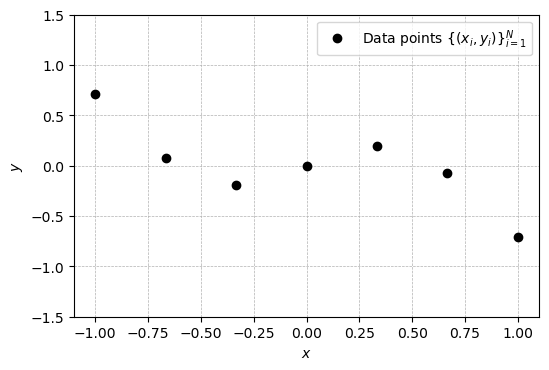

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

N = 7 # the number of data points
xs = np.linspace(-1, 1, num=N) # the x_i's
ys = np.sin(5*xs)*np.exp(np.abs(2*xs)) / 10 # the y_i's

fig, axes = plt.subplots(dpi=100)
axes.plot(xs,ys,'ko')
axes.legend([r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$'])
axes.set_xlabel('$x$')
axes.set_ylabel('$y$')
axes.grid(linestyle='dashed', linewidth=0.5)
axes.set_ylim([-1.5, 1.5]);

We wish to fit a polynomial model $m(\cdot;\theta)$ of degree $n=3$ (overdetermined) and $n=9$ (underdetermined) to the data points  $\{(x_{i},y_{i})\}_{i=1}^{N}$ by solving optimization problem (1) or equivalently (2) in __Exercise 1__ above.

---
__a)__ First, do this by implementing the GD method. The GD method is given by
- Pick $\theta_{0}\in\mathbb{R}^{n+1}$
- For $k\geq 0$:
    - Set $\theta_{k+1} = \theta_{k} - \gamma_{k} \nabla f(\theta_{k})$ for some $\gamma_{k}>0$.

Pick $\theta_{0} = 0$ as the initial point, and try the constant step size

1. $\gamma_{k} = 1 / \beta$,

and run for $10^5$ iterations. Here, $\beta$ is the smoothness parameter from __Exercise 1__ above. Plot, in log-linear scale, both

- $f(\theta_{k})-f(\theta^{*})$ and
- $f(\overline{\theta}_{k})-f(\theta^{*})$ where $\overline{\theta}_{k} = \frac{1}{k+1}\sum_{l=0}^{k}\theta_{l}$, (Hint: use [sequential average computation](https://math.stackexchange.com/questions/106313/regular-average-calculated-accumulatively))

as a function of iteration number $k$. Give comments:
- Describe any difference between the $n=3$ (overdetermined) and $n=9$ (underdetermined) cases.



_Hint:_ What is $f(\theta^{*})$ in the overdetermined and underdetermined case, respectively? 

__Solution:__ 

Please see the figures below. The under determined case is much slower to converge as shown below. Which is to be expected since the under determined problem is larger.

In [3]:
# Write your code here
import numpy as np
def phi(x, n):
    return np.array([x**k for k in range(0, n)]).T

def f(theta, X, Y, N):
    return 1/N * np.linalg.norm(X @ theta - Y, ord = 2)**2

def grad_f(theta, X, Y, N):
    return 2 / N * X.T @ (X @ theta - Y)

def get_beta(X, N):
    return 2 / N * np.linalg.norm(X.T @ X, ord = 2)


def solve_num(num_iters, theta_0, X, Y, gamma, N):
    theta = theta_0
    theta_bar = theta_0
    thetas = [theta_0]
    thetas_bar = [theta_0]
    for k in range(0, num_iters):
        theta = theta - gamma * grad_f(theta, X, Y, N)
        theta_bar = (theta_bar *(k+1) + theta) / (k+2)
        thetas.append(theta)
        thetas_bar.append(theta_bar)
    return thetas, thetas_bar

def get_theta_opt(X, Y):
    return np.linalg.inv(X.T @ X) @ X.T @ Y

#Under determined case
N = 7 # the number of data points
X = phi(xs, 3) # the x_i's
Y = ys # the y_i's
theta_0 = np.zeros(X.shape[1])

thetas, thetas_bar = solve_num(int(1e5), theta_0, X, Y, 1 / get_beta(X, N), N)

#Over determined case
N = 7 # the number of data points
X_2 = phi(xs, 9) # the x_i's
Y_2 = ys # the y_i's
theta_0 = np.zeros(X_2.shape[1])

thetas_2, thetas_bar_2 = solve_num(int(1e5), theta_0, X_2, Y_2, 1 / get_beta(X_2, N), N)
    

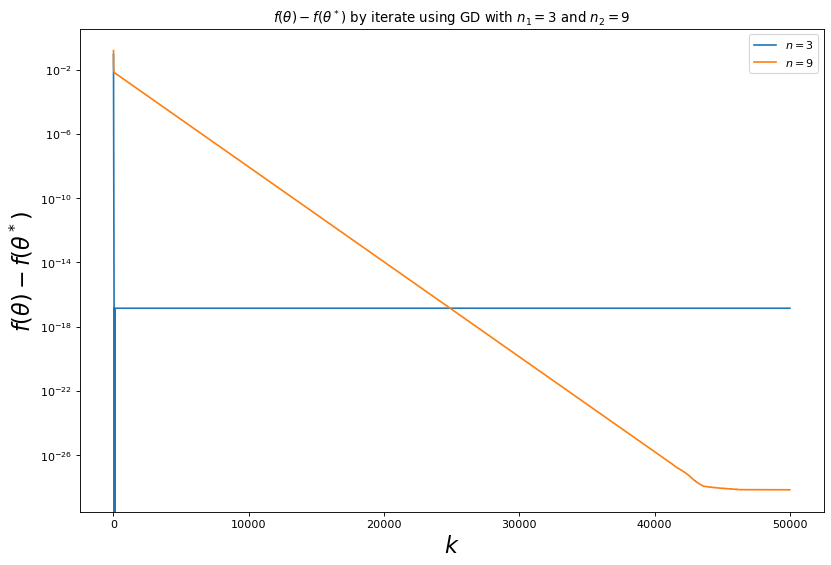

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 8), dpi=80)
theta_opt = get_theta_opt(X, Y)

plt.semilogy([f(theta, X, Y, N) - f(theta_opt, X, Y, N) for theta in thetas[0:50000]], label = '$n = 3$')
plt.semilogy([f(theta, X_2, Y_2, N) - 0 for theta in thetas_2[0:50000]], label = '$n = 9$')
plt.xlabel('$k$', fontsize = 20)
plt.ylabel(r'$f(\theta) - f(\theta^*)$ ', fontsize = 20)
plt.title(r'$f(\theta) - f(\theta^*)$ by iterate using GD with $n_1 = 3$ and $n_2 = 9$')
plt.legend();

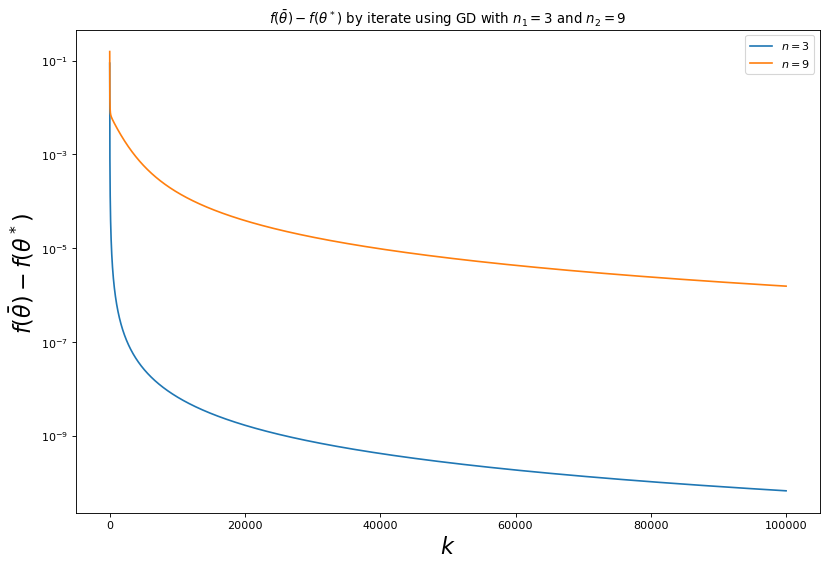

In [5]:
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = False
fig = plt.figure(figsize=(12, 8), dpi=80)
theta_opt = get_theta_opt(X, Y)
plt.semilogy([f(theta, X, Y, N) - f(theta_opt, X, Y, N) for theta in thetas_bar[0::]],label = '$n = 3$')
plt.semilogy([f(theta, X_2, Y_2, N) - 0 for theta in thetas_bar_2[0::]],label = '$n = 9$')
plt.xlabel('$k$', fontsize = 20)
plt.ylabel(r'$f(\bar{\theta}) - f(\theta^*)$ ', fontsize = 20)
plt.title(r'$f(\bar{\theta}) - f(\theta^*)$ by iterate using GD with $n_1 = 3$ and $n_2 = 9$')
plt.legend();

---
__b)__ Next, do this by implementing the SGD method. The SGD method is given by
- Pick $\theta_{0}\in\mathbb{R}^{n+1}$
- For $k\geq 0$:
    - Pick $i\in\{1,\ldots,N\}$ uniformly at random
    - Set $\theta_{k+1} = \theta_{k} - \gamma_{k} \nabla f_{i}(\theta_{k})$ for some $\gamma_{k}>0$.

Pick $\theta_{0} = 0$ and try the step sizes

1. $\gamma_{k} = \frac{0.1}{\beta}$,
2. $\gamma_{k} = \frac{0.1}{\beta(k+1)}$,
3. $\gamma_{k} = \frac{0.1}{\beta(\lfloor k/1000\rfloor+1)}$, where $\lfloor \cdot \rfloor$ is the floor function,

and run for $10^5 N$ iterations. Plot, in log-linear scale, both

- $f(\theta_{k})-f(\theta^{*})$ and
- $f(\overline{\theta}_{k})-f(\theta^{*})$ where $\overline{\theta}_{k} = \frac{1}{k+1}\sum_{l=0}^{k}\theta_{l}$,

as a function of iteration number $k$. Give comments:
- Does the step sizes matter? 
- Is there a difference between the $n=3$ (overdetermined) and $n=9$ (underdetermined) cases. 
- Which combination worked best? 
- Which combination of $\gamma_{k}$ and $n$ (i.e. overdetermined or underdetermined) corresponds the most to training of neural networks? This question qualitative and has no unique answer.

__Solution:__ 

Yes the stepsize matters. The SGD algorithm does not converge for a constant step size as it did with the deterministic algorithm in the under-parameterized setting. However, the algorithm does converge in the over-parameterized setting when constant step size is used. If the algorithm converges a larger step size is, naturally, preferable as it converges faster. The best-performing setup is the over parameterized setting using a constant step size. This is the setup mostly resembles training of a deep neural network (DNN). In applications a DNN is often overparameterized and trained with some variation of SGD. Our over-parameterized linear regressor can be viewed as a (rather shallow) neural network with identity mappings as activation functions. In DNN training, the learning rate, corresponding to our step size, is often scheduled to decrease after a number of iterations using a learning rate scheduling scheme. This would correspond one of the decreasing step size expressions that were implemented.

In [312]:
# Write your code here
# Write your code here
import numpy as np
import functools
from tqdm import tqdm
def phi(x, n):
    return np.array([x**k for k in range(0, n)]).T

def f(theta, X, Y, N):
    return 1/N * np.linalg.norm(X @ theta - Y, ord = 2) ** 2

def grad_fi(x_i, y_i, theta):
    return 2 * (x_i @ theta - y_i) * x_i 

def get_beta(X, N):
    return 2 / N * np.linalg.norm(X.T @ X, ord = 2)

def get_gamma(beta, gamma_type = None, k = 0):
    if gamma_type is None:
        return 0.1 / beta
    if gamma_type == 'decreasing':
        return 0.1 / beta / (k+1)
    if gamma_type == 'decreasing_floor':
        return 0.1 / beta / (np.floor(k/1000) + 1)
    return 1/beta

def solve_num(num_iters, theta_0, X, Y, N, beta, gamma_type = None):
    theta = theta_0
    theta_bar = theta_0
    thetas = []
    thetas_bar = []
    for k in range(0, num_iters):
        thetas.append(theta)
        thetas_bar.append(theta_bar)
        gamma = get_gamma(beta, gamma_type = gamma_type, k = k)
        rand_index = np.random.randint(low = 0, high = N, size = None)
        x_i, y_i = X[rand_index], Y[rand_index]
        theta = theta - gamma * grad_fi(x_i, y_i, theta)
        theta_bar = (theta_bar *(k+1) + theta) / (k+2)
    return thetas, thetas_bar

def get_theta_opt(X, Y):
    return np.linalg.inv(X.T @ X) @ X.T @ Y

# Over-Determined Case, n = 3

In [324]:
#Under determined case
N = 7 # the number of data points
n = 3
X = phi(xs, n+1) # the x_i's
Y = ys # the y_i's
theta_0 = np.zeros(X.shape[1])
gamma_types = [None, 'decreasing', 'decreasing_floor']  
num_iters = int(1e5) * N
beta = get_beta(X,N)
thetas = []
thetas_bar = []

for gamma_type in tqdm(gamma_types):
    t,t_bar = solve_num(num_iters, theta_0, X, Y, N, beta, gamma_type = gamma_type)
    thetas.append(t)
    thetas_bar.append(t_bar)

100%|██████████| 3/3 [01:07<00:00, 22.48s/it]


In [325]:
#get function values for plotting
theta_opt = get_theta_opt(X, Y)
fs = []
fs_bar = []
for t, t_bar in tqdm(zip(thetas,thetas_bar)):
    fs.append([f(theta, X, Y, N) - f(theta_opt, X, Y, N) for theta in t])
    fs_bar.append([f(theta, X, Y, N) - f(theta_opt, X, Y, N) for theta in t_bar])

3it [02:29, 49.69s/it]


In [326]:
gamma_labels = [r'$\gamma_k = \frac{0.1}{\beta}$',
                r'$\gamma_k = \frac{0.1}{\beta(k+1)}$',
                r'$\gamma_k = \frac{0.1}{\beta(\lfloor k/1000 \rfloor +1)}$'] 

/Users/nils/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


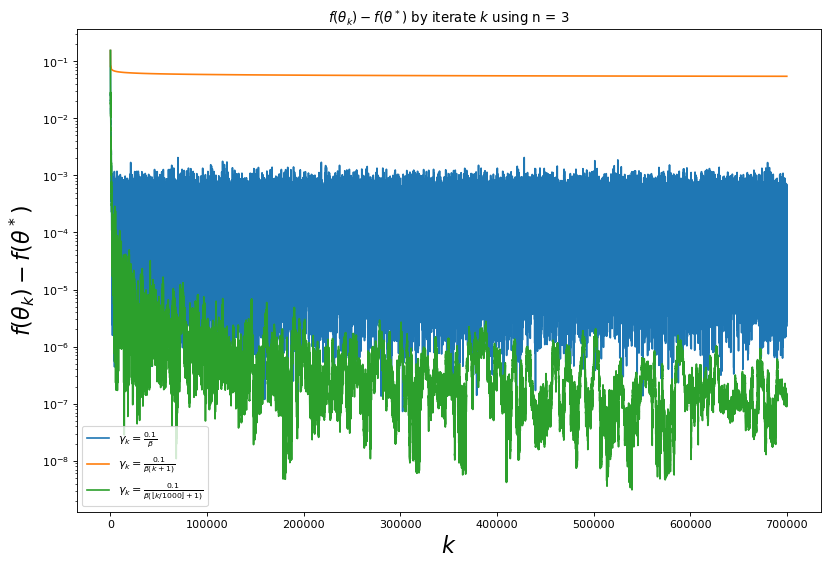

In [327]:
fig = plt.figure(figsize=(12, 8), dpi=80)
for fs_ in fs:
    plt.semilogy(fs_,label = '$n = 3$')
plt.xlabel('$k$', fontsize = 20)
plt.ylabel(r'$f(\theta_k) - f(\theta^*)$', fontsize = 20)
plt.legend(gamma_labels)
plt.title(r'$f(\theta_k) - f(\theta^*)$ by iterate $k$ using n = 3');

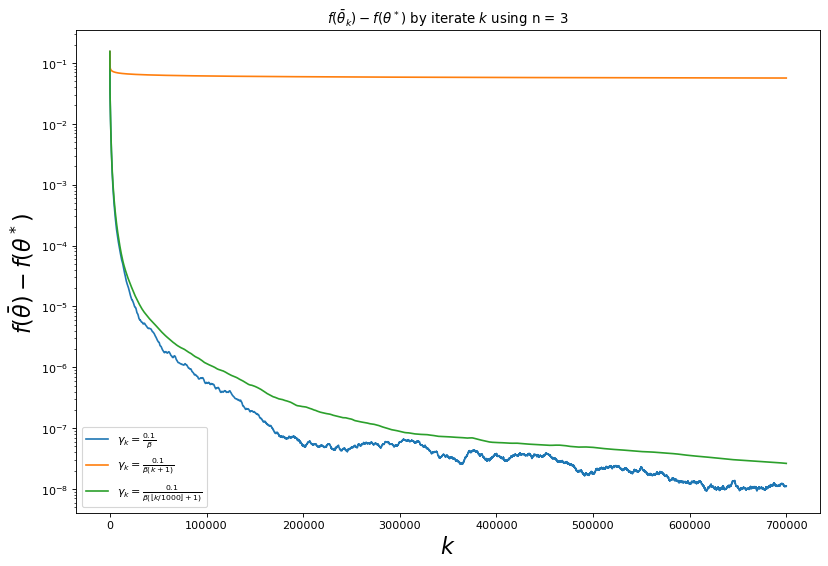

In [328]:
fig = plt.figure(figsize=(12, 8), dpi=80)
for fs_ in fs_bar:
    plt.semilogy(fs_,label = '$n = 3$')
plt.xlabel('$k$', fontsize = 20)
plt.ylabel(r'$f(\bar{\theta}) - f(\theta^*)$ ', fontsize = 20)
plt.legend(gamma_labels)
plt.title(r'$f(\bar{\theta}_k) - f(\theta^*)$ by iterate $k$ using n = 3');

# Under-Determined, n = 9

In [329]:
#Over determined case
N = 7 # the number of data points
n = 9
X = phi(xs, n+1) # the x_i's
Y = ys # the y_i's
theta_0 = np.zeros(X.shape[1])
gamma_types = [None, 'decreasing', 'decreasing_floor']  
num_iters = int(1e5) * N
beta = get_beta(X,N)
thetas = []
thetas_bar = []

for gamma_type in tqdm(gamma_types):
    t,t_bar = solve_num(num_iters, theta_0, X, Y, N, beta, gamma_type = gamma_type)
    thetas.append(t)
    thetas_bar.append(t_bar)

100%|██████████| 3/3 [01:10<00:00, 23.65s/it]


In [330]:
#get function values for plotting
theta_opt = get_theta_opt(X, Y)
fs = []
fs_bar = []
for t, t_bar in tqdm(zip(thetas,thetas_bar)):
    fs.append([f(theta, X, Y, N) - 0 for theta in t])
    fs_bar.append([f(theta, X, Y, N) - 0 for theta in t_bar])

3it [01:22, 27.37s/it]


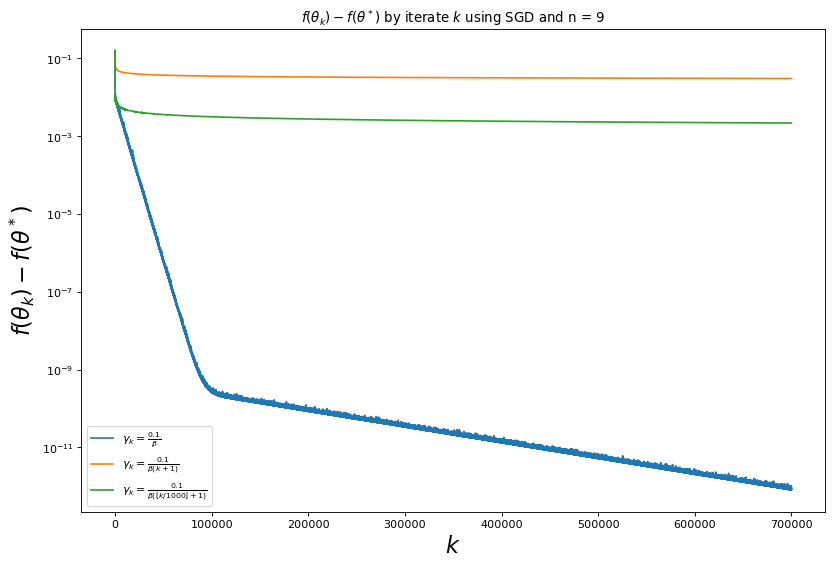

In [331]:
fig = plt.figure(figsize=(12, 8), dpi=80)
for fs_ in fs:
    plt.semilogy(fs_,label = '$n = 3$')
plt.xlabel('$k$', fontsize = 20)
plt.ylabel(r'$f(\theta_k) - f(\theta^*)$', fontsize = 20)
plt.legend(gamma_labels)
plt.title(r'$f(\theta_k) - f(\theta^*)$ by iterate $k$ using SGD and n = 9');

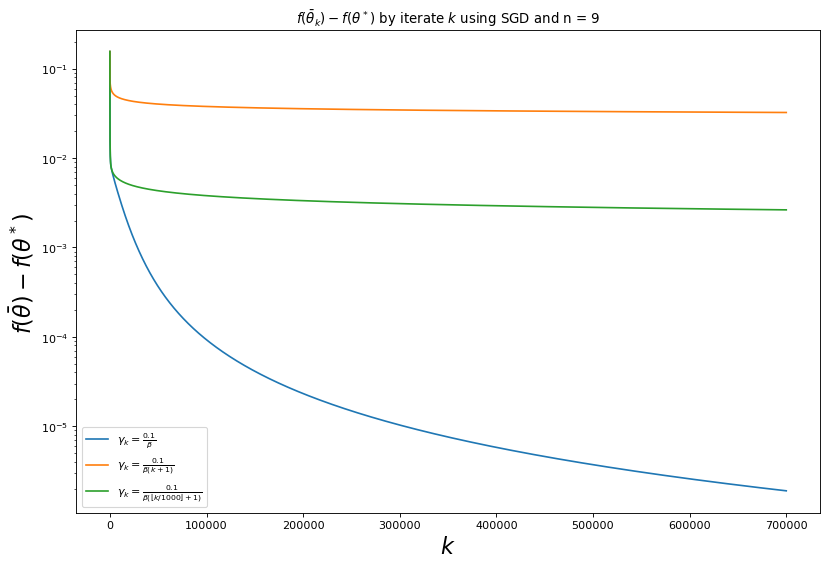

In [332]:
fig = plt.figure(figsize=(12, 8), dpi=80)
for fs_ in fs_bar:
    plt.semilogy(fs_,label = '$n = 3$')
plt.xlabel('$k$', fontsize = 20)
plt.ylabel(r'$f(\bar{\theta}) - f(\theta^*)$ ', fontsize = 20)
plt.legend(gamma_labels)
plt.title(r'$f(\bar{\theta}_k) - f(\theta^*)$ by iterate $k$ using SGD and n = 9');

---
### Exercise 3: Fitting points in $\mathbb{R}$ using fully connected feedforward neural networks

Again, we consider the data points $\{(x_{i},y_{i})\}_{i=1}^{N}\subseteq\mathbb{R}\times\mathbb{R}$, where $N=7$, below:


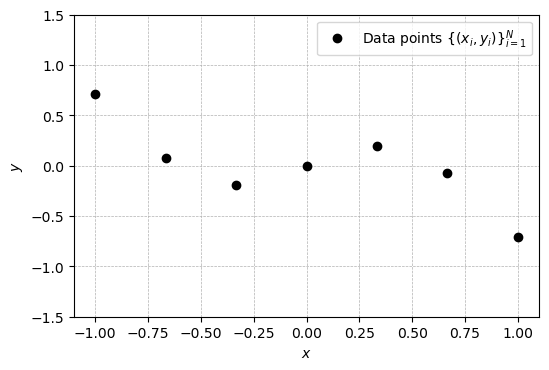

In [4]:
N = 7 # the number of data points
xs = np.linspace(-1, 1, num=N) # the x_i's
ys = np.sin(5*xs)*np.exp(np.abs(2*xs)) / 10 # the y_i's

fig, axes = plt.subplots(dpi=100)
axes.plot(xs,ys,'ko')
axes.legend([r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$'])
axes.set_xlabel('$x$')
axes.set_ylabel('$y$')
axes.grid(linestyle='dashed', linewidth=0.5)
axes.set_ylim([-1.5, 1.5]);

Polynomial fitting as in __Exercise 1__ and __Exercise 2__ gives:

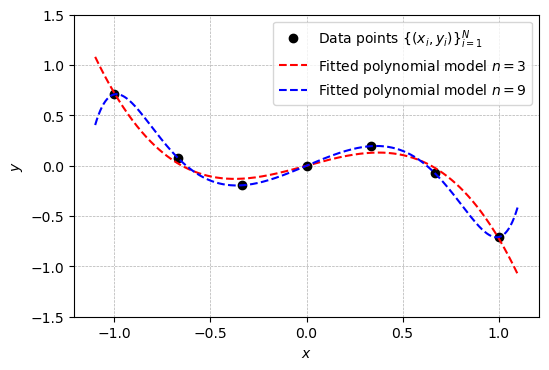

In [5]:
theta_star_n_9 = np.array([0,  0.8, 0, -1.9, 0, -0.583957507, 0, 0.28, 0, 0.695322536])
theta_star_n_3 = np.array([0,  0.523557283,  0, -1.24520755])
x = np.linspace(-1.1, 1.1, num = 1000)

fig, axes = plt.subplots(dpi=100)
axes.plot(xs,ys,'ko')
axes.plot(x, np.polyval(np.flip(theta_star_n_3), x),'r--')
axes.plot(x, np.polyval(np.flip(theta_star_n_9), x),'b--')
axes.legend([r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$', r'Fitted polynomial model $n=3$', r'Fitted polynomial model $n=9$'])
axes.set_xlabel('$x$')
axes.set_ylabel('$y$')
axes.grid(linestyle='dashed', linewidth=0.5)
axes.set_ylim([-1.5, 1.5]);

In this exercise, we are going to explore fitting of these data points using fully connected feedforward neural networks. We will do this by considering the problem

$$
\begin{align}\label{eq:3}\tag{3}
		\underset{\theta}{\mathrm{minimize}} \frac{1}{N}\sum_{i=1}^N L(m(x_i;\theta),y_i)
\end{align}
$$

where $L:\mathbb{R}\times\mathbb{R}\rightarrow\mathbb{R}$ is the least squares loss, i.e.

$$
\begin{align*}
L(u,y) = (u-y)^{2}
\end{align*}
$$

for each $u,y\in\mathbb{R}$ and $m(\cdot;\theta):\mathbb{R}\rightarrow\mathbb{R}$ is a fully connected feedforward neural network model, i.e.

$$
\begin{align*}
m(x;\theta) = W_{D}\sigma_{D-1}(W_{D-1}\sigma_{D-2}(...\sigma_1(W_1 x + b_{1})...)+b_{D-1})+b_{D}	
\end{align*}
$$

for each $x\in\mathbb{R}$, where $\sigma_i$ is an activation functions that act elements-wise, for each $i=1,\ldots,D-1$, and

$$
\begin{align*}
    \theta = (W_{1},b_1,\ldots,W_{D},b_{D})
\end{align*}
$$

such that

$$
\begin{align*}
    \begin{cases}
        W_{1}\in\mathbb{R}^{f_{1} \times 1}& \text{ and }\quad b_{1} \in\mathbb{R}^{f_1}\\	
        W_{i}\in\mathbb{R}^{f_{i} \times f_{i-1}}& \text{ and }\quad b_{i} \in\mathbb{R}^{f_i} \quad\text{ for }\quad i=2,\ldots,D-1 \\
        W_{D}\in\mathbb{R}^{1 \times f_{D-1}}& \text{ and }\quad b_{D} \in\mathbb{R}.
    \end{cases}
\end{align*}
$$

In particular, we will study how the trained model $m(\cdot;\theta)$ depends on:
- The widths ($f_{i}$) and depth ($D$)
- Different activation functions ($\sigma_{i}$)
- Different initial points $\theta_{0}$ used in training
- Different training algorithms such as SGD and and Adam

We will also study:
- How the loss landscape of (3) looks along different directions at an "optimal point" of (3). (Note that we in general have no guarantees that our optimization algorithms will reach a true optimal point of (3) since the problem in nonconvex in general.)

_Remark:_
We will train the models using `pytorch`. `pytorch` is a widely used library or *module* for doing machine learning in python.
It allows the user to construct, train and evaluate neural networks.

- You will need to [install](https://anaconda.org/pytorch/pytorch) `pytorch`

Take a quick look at `pytorch`'s
- [tutorials](https://pytorch.org/tutorials/)
- [documentation](https://pytorch.org/docs/stable/index.html)

---
`pytorch` expects to get data from a `DataLoader` object. Below we create a `DataLoader` and provide it with our data:

In [6]:
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from torch import optim

torch_xs = torch.tensor(xs.reshape((N,1)), dtype=torch.float32)
torch_ys = torch.tensor(ys.reshape((N,1)), dtype=torch.float32)
dataset = TensorDataset(torch_xs, torch_ys)
data_loader = DataLoader(dataset, batch_size=len(xs)) # other batch sizes are of course allowed

Typically in `pytorch`, models are defined as a child of the `nn.Module` class. Below, we create a model with:
- Depth $D=2$
- Width $f_1=10$
- ReLU as activation function 

In [7]:
#The vanilla MLP 
class model_vanilla(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(in_features=1, out_features=10)
        self.linear2 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x):
        x = self.linear1(x)
        x = F.relu(x)
        x = self.linear2(x)
        return x

# Create an instance of the model class.
model = model_vanilla()

In machine learning, the objective function in (3) is sometimes itself called a loss function. In fact, it is already [implemented](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html) in `pytorch` and we create the corresponding loss function object below:

In [14]:
loss_fn = nn.MSELoss()

`torch.optim` is a `pytorch` package implementing various optimization algorithms. Below we create an optimizer object that allows us to take a SGD step with step-size/learning rate equal to $0.05$.

In [18]:
optimizer = optim.SGD(model.parameters(), lr=0.05)

Once we have defined the data loader, the model, the loss function and the optimizer as above, we can train the network by simply following these steps in a loop:
1. Sample a batch of data from our dataset
2. Compute the model's prediction on the batch
3. Compute the loss of the prediction w.r.t. ground-truth
4. Backpropagate the loss through the model's parameters
5. Perform one training step.

We will do this for $2000$ epochs.

In [19]:
for epoch in range(2000):
    losses_in_epoch = []
    for batch in data_loader:

        # 1. These are the sampled batches of inputs and ground-truth
        batch_x, batch_y = batch
        
        # 2. Compute the model's prediction on the batch
        pred = model(batch_x)
        
        # 3. Compute the loss of the prediction w.r.t. ground-truth
        loss = loss_fn(pred, batch_y)
        
        # Save losses in a list for averaging later (not sctrictly necessary for batch_size = len(x))
        losses_in_epoch.append(loss)
        
        # 4. Backpropagation
        loss.backward()
        
        # 5. One step of SGD
        optimizer.step()
        
        # Zero the gradients computed in the backpropagation, for starting new optimization step
        optimizer.zero_grad()

    # Every 100th epoch, display progress
    if epoch % 100 == 0:
        print('Epoch: {}\tLoss: {}'.format(epoch, sum(losses_in_epoch)/len(losses_in_epoch)))

Epoch: 0	Loss: 0.33633747696876526
Epoch: 100	Loss: 0.06655298918485641
Epoch: 200	Loss: 0.06285341829061508
Epoch: 300	Loss: 0.059171248227357864
Epoch: 400	Loss: 0.05378875881433487
Epoch: 500	Loss: 0.047543518245220184
Epoch: 600	Loss: 0.04215618222951889
Epoch: 700	Loss: 0.03668883815407753
Epoch: 800	Loss: 0.03115692362189293
Epoch: 900	Loss: 0.025591498240828514
Epoch: 1000	Loss: 0.020587684586644173
Epoch: 1100	Loss: 0.016500910744071007
Epoch: 1200	Loss: 0.013043031096458435
Epoch: 1300	Loss: 0.01015225239098072
Epoch: 1400	Loss: 0.00777072086930275
Epoch: 1500	Loss: 0.005844034254550934
Epoch: 1600	Loss: 0.004317874554544687
Epoch: 1700	Loss: 0.003136073937639594
Epoch: 1800	Loss: 0.0022415800485759974
Epoch: 1900	Loss: 0.0015791415935382247


Below we plot trained model:

Traing loss: 0.00110


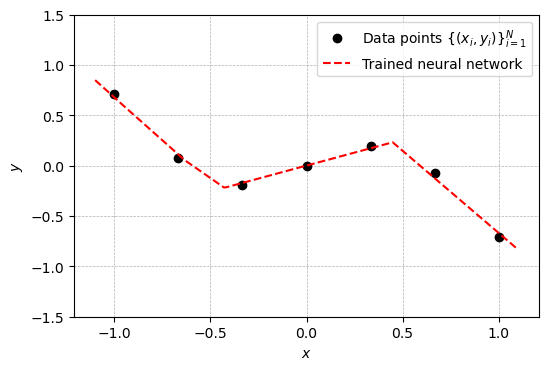

In [20]:
with torch.no_grad():
    x = np.linspace(-1.1, 1.1, num = 1000)
    torch_x = torch.tensor(x.reshape((1000,1)), dtype=torch.float32)
    y_pred = model(torch_x).numpy()
    
    fig, axes = plt.subplots(dpi=100)
    axes.plot(xs,ys,'ko')
    axes.plot(x, y_pred,'r--')
    axes.legend([r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$', r'Trained neural network'])
    axes.set_xlabel('$x$')
    axes.set_ylabel('$y$')
    axes.grid(linestyle='dashed', linewidth=0.5)
    axes.set_ylim([-1.5, 1.5]);
    
    print("Traing loss: {:.5f}".format(loss_fn(model(torch_xs),torch_ys).item()))

__a)__ First, we experiment with the widths ($f_{i}$) and depth ($D$).

Choose widths ($f_{i}$) and depth ($D$) such that:
- the network becomes underparameterized (motive why it is underparameterized)
- the network becomes overparameterized (motive why it is overparameterized)

and train the model as above.

In this subproblem, keep the activation functions fixed as ReLU. However, you are free to experiment with the learning rate and the number of epoch.

How does these two cases differ? Give a qualitative and quantitative analysis.

__Solution:__ 

The network with one input layer, one hidden layer and one output layer, all with one node, is under-parameterized since it has 6 parameters which is fewer than 7 data points. The deeper and wider network, implemented below, is over-parameterized since it has 681 parameters which is more than 7 data points. The overparameterized can achieve perfect fit (in our case, for 2000 epochs it achieves a very small loss) while the underparameterized cannot. Judging from the fitted curve the model with more parameters is more expressive (over-fitted) compared to the one with less which is under-fitted.

In [9]:
# Write your code here

In [10]:
def train(model, data_loader):
    for epoch in range(2000):
        losses_in_epoch = []
        for batch in data_loader:

            # 1. These are the sampled batches of inputs and ground-truth
            batch_x, batch_y = batch

            # 2. Compute the model's prediction on the batch
            pred = model(batch_x)

            # 3. Compute the loss of the prediction w.r.t. ground-truth
            loss = loss_fn(pred, batch_y)

            # Save losses in a list for averaging later (not sctrictly necessary for batch_size = len(x))
            losses_in_epoch.append(loss)

            # 4. Backpropagation
            loss.backward()

            # 5. One step of SGD
            optimizer.step()

            # Zero the gradients computed in the backpropagation, for starting new optimization step
            optimizer.zero_grad()

        # Every 100th epoch, display progress
        if epoch % 100 == 0:
            print('Epoch: {}\tLoss: {}'.format(epoch, sum(losses_in_epoch)/len(losses_in_epoch)))

In [11]:
def inference(model):
    with torch.no_grad():
        x = np.linspace(-1.1, 1.1, num = 1000)
        torch_x = torch.tensor(x.reshape((1000,1)), dtype=torch.float32)
        y_pred = model(torch_x).numpy()

        fig, axes = plt.subplots(dpi=100)
        axes.plot(xs,ys,'ko')
        axes.plot(x, y_pred,'r--')
        axes.legend([r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$', r'Trained neural network'])
        axes.set_xlabel('$x$')
        axes.set_ylabel('$y$')
        axes.grid(linestyle='dashed', linewidth=0.5)
        axes.set_ylim([-1.5, 1.5]);

        print("Traing loss: {:.5f}".format(loss_fn(model(torch_xs),torch_ys).item()))

In [12]:
def get_n_params(model):
    pp=0
    for p in list(model.parameters()):
        nn=1
        for s in list(p.size()):
            nn = nn*s
        pp += nn
    return pp

Epoch: 0	Loss: 0.2242584377527237
Epoch: 100	Loss: 0.15389588475227356
Epoch: 200	Loss: 0.1480618417263031
Epoch: 300	Loss: 0.12885653972625732
Epoch: 400	Loss: 0.09441011399030685
Epoch: 500	Loss: 0.07317274808883667
Epoch: 600	Loss: 0.06838474422693253
Epoch: 700	Loss: 0.06773333251476288
Epoch: 800	Loss: 0.06775446981191635
Epoch: 900	Loss: 0.06768938153982162
Epoch: 1000	Loss: 0.06768938153982162
Epoch: 1100	Loss: 0.06768938153982162
Epoch: 1200	Loss: 0.06768938153982162
Epoch: 1300	Loss: 0.06768938153982162
Epoch: 1400	Loss: 0.06768938153982162
Epoch: 1500	Loss: 0.06768938153982162
Epoch: 1600	Loss: 0.06768938153982162
Epoch: 1700	Loss: 0.06768938153982162
Epoch: 1800	Loss: 0.06768938153982162
Epoch: 1900	Loss: 0.06768938153982162
Traing loss: 0.06769


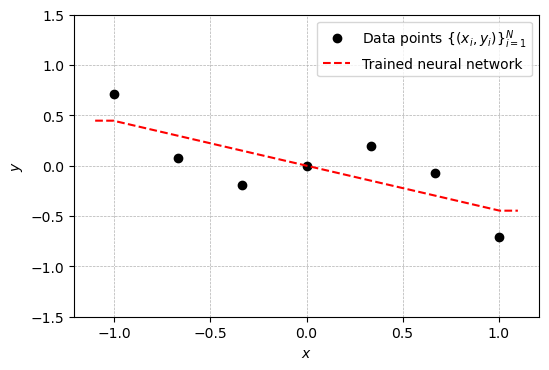

In [18]:
# Write your code here

# A small Network
class model_under(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(in_features=1, out_features=1)
        self.linear2 = nn.Linear(in_features=1, out_features=1)
        self.linear3 = nn.Linear(in_features=1, out_features=1)

    def forward(self, x):
        x = self.linear1(x)
        x = F.relu(x)
        x = self.linear2(x)
        x = F.relu(x)
        x = self.linear3(x)
        return x

# Create an instance of the model class.
model = model_under()
optimizer = optim.SGD(model.parameters(), lr=0.05)
train(model, data_loader)
inference(model)

In [306]:
get_n_params(model)

6

Epoch: 0	Loss: 0.19660043716430664
Epoch: 100	Loss: 0.07689934968948364
Epoch: 200	Loss: 0.05266096442937851
Epoch: 300	Loss: 0.03903114050626755
Epoch: 400	Loss: 0.027491426095366478
Epoch: 500	Loss: 0.015237346291542053
Epoch: 600	Loss: 0.005293295253068209
Epoch: 700	Loss: 0.0010397958103567362
Epoch: 800	Loss: 0.00015497337153647095
Epoch: 900	Loss: 3.403013033675961e-05
Epoch: 1000	Loss: 1.8477763660484925e-05
Epoch: 1100	Loss: 1.4995405763329472e-05
Epoch: 1200	Loss: 1.304153829551069e-05
Epoch: 1300	Loss: 1.1454370905994438e-05
Epoch: 1400	Loss: 1.0074683814309537e-05
Epoch: 1500	Loss: 8.862798495101742e-06
Epoch: 1600	Loss: 7.796877980581485e-06
Epoch: 1700	Loss: 6.858791948616272e-06
Epoch: 1800	Loss: 6.033174031472299e-06
Epoch: 1900	Loss: 5.3067642511450686e-06
Traing loss: 0.00000


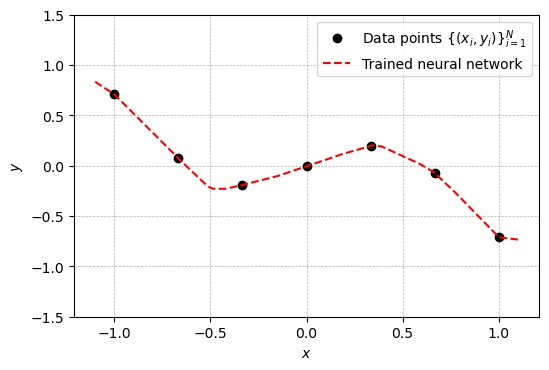

In [333]:
# Write your code here

# A larger network
class model_over(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(in_features=1, out_features=20)
        self.linear2 = nn.Linear(in_features=20, out_features=20)
        self.linear3 = nn.Linear(in_features=20, out_features=10)
        self.linear4 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x):
        x = self.linear1(x)
        x = F.relu(x)
        x = self.linear2(x)
        x = F.relu(x)
        x = self.linear3(x)
        x = F.relu(x)
        x = self.linear4(x)
        return x

# Create an instance of the model class.
model = model_over()
optimizer = optim.SGD(model.parameters(), lr=0.05)
train(model, data_loader)
inference(model)

In [347]:
%%capture #supress print outputs
model_u = model_under()
optimizer = optim.SGD(model_u.parameters(), lr=0.05)
train(model_u, data_loader)
model_o = model_over()
optimizer = optim.SGD(model_o.parameters(), lr=0.05)
train(model_o, data_loader)

Traing loss Over Param: 0.00000
Traing loss Under Param: 0.06769


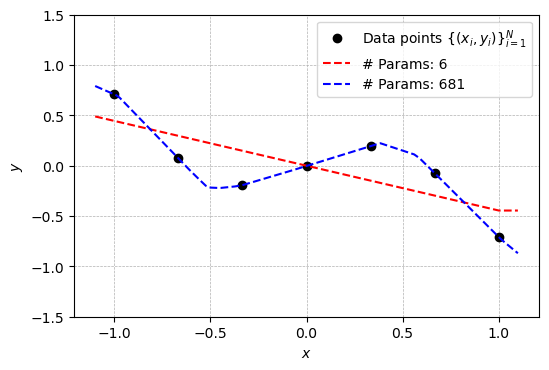

In [348]:
with torch.no_grad():
    x = np.linspace(-1.1, 1.1, num = 1000)
    torch_x = torch.tensor(x.reshape((1000,1)), dtype=torch.float32)
    y_pred_u = model_u(torch_x).numpy()
    y_pred_o = model_o(torch_x).numpy()
    n_params_u = get_n_params(model_u)
    n_params_o = get_n_params(model_o)
    
    
    fig, axes = plt.subplots(dpi=100)
    axes.plot(xs,ys,'ko')
    axes.plot(x, y_pred_u,'r--')
    axes.plot(x, y_pred_o,'b--')
    axes.legend([r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$', f'# Params: {n_params_u}', f'# Params: {n_params_o}'])
    axes.set_xlabel('$x$')
    axes.set_ylabel('$y$')
    axes.grid(linestyle='dashed', linewidth=0.5)
    axes.set_ylim([-1.5, 1.5]);

    print("Traing loss Over Param: {:.5f}".format(loss_fn(model_o(torch_xs),torch_ys).item()))
    print("Traing loss Under Param: {:.5f}".format(loss_fn(model_u(torch_xs),torch_ys).item()))



In [346]:
get_n_params(model)

6

__b)__ Second, we will try out different activation functions ($\sigma_{i}$).

Train two overparameterized networks with the same widths and depth, using
- ReLU activation at each layer for one of the networks, and
- 4 * sigmod activation at each layer for the other network.

You are free to experiment with the learning rate and the number of epoch.

How does these two cases differ? Give a qualitative and quantitative analysis.

__Solution:__ 

The ReLu-model achieves a better fit with a smaller loss than the sigmoid-model. The ReLu-model is piecewise linear which follows from the nature of the ReLu function (it is also piecewise linear) while the sigmoid is smooth. The sigmoid does also vary alot from time to time you run it, the predictions are quite different when the model is trained again. One may note from the plotted curves that the predicted solution is smoother using the sigmoid activation function

Epoch: 0	Loss: 0.2235795259475708
Epoch: 100	Loss: 0.11332957446575165
Epoch: 200	Loss: 0.09030430018901825
Epoch: 300	Loss: 0.07707452774047852
Epoch: 400	Loss: 0.0708509311079979
Epoch: 500	Loss: 0.06848568469285965
Epoch: 600	Loss: 0.06772495806217194
Epoch: 700	Loss: 0.06750213354825974
Epoch: 800	Loss: 0.06743644922971725
Epoch: 900	Loss: 0.06741325557231903
Epoch: 1000	Loss: 0.06740100681781769
Epoch: 1100	Loss: 0.0673915445804596
Epoch: 1200	Loss: 0.06738273054361343
Epoch: 1300	Loss: 0.06737404316663742
Epoch: 1400	Loss: 0.06736532598733902
Epoch: 1500	Loss: 0.06735656410455704
Epoch: 1600	Loss: 0.06734772026538849
Epoch: 1700	Loss: 0.06733883172273636
Epoch: 1800	Loss: 0.06732980161905289
Epoch: 1900	Loss: 0.06732070446014404
Traing loss: 0.06731
 # Parameters in model: 31


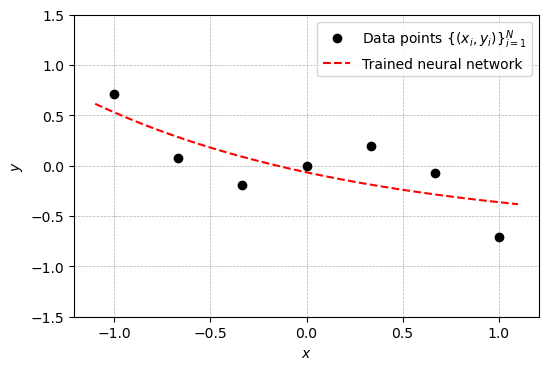

In [299]:
class model_sigmoid(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(in_features=1, out_features=10)
        self.linear2 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x):
        x = self.linear1(x)
        x = 4 * torch.sigmoid(x)
        x = self.linear2(x)
        return x

# Create an instance of the model class.
model = model_sigmoid()
optimizer = optim.SGD(model.parameters(), lr=0.05)
train(model, data_loader)
inference(model)
print(f' # Parameters in model: {get_n_params(model)}')

__c)__ Third, we consider different initial points ($\theta_{0}$) used in training.


For an overparameterized network with ReLU activation functions at each layer and fixed widths and depth, train it with different initial point (note that the constructor of `nn.Module` will initialize the parameters randomly).

Does the initial point affect the final trained network? Give a qualitative and quantitative analysis.

__Solution:__ 

The parameters are not the same for the two different models, however the prediction of the two models is the same and they achieve basically the same loss. It is a non-convex problem with both random initialization and progression. Hence, it is no surprise that they will differ. If we compare the weights then we can see that they are not the same. This comparison is done by training the model once with random initialization, saving the weights and subsequently training a copy of the model with other initial weights. The final weights after training can then be compared. Analysis below shows that they are not the same.

In [26]:
# Hint: The code below prints the parameters of the network 'model'

params = []
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)
        params.append(param.data)

# Write your code here

linear1.weight tensor([[0.3476]])
linear1.bias tensor([-0.3071])
linear2.weight tensor([[0.9012]])
linear2.bias tensor([0.7198])


In [21]:
%%capture
#Fit model twice. add weights of first linear layer to list. Only need to look at one layer since if these are
#Not the same the weights are non-identical
model = model_vanilla()
optimizer = optim.SGD(model.parameters(), lr=0.05)
params = []
for i in range(1,3):
    train(model, data_loader)
    p = []
    for name, param in model.named_parameters():
        if param.requires_grad:
            p.append(param.data)
        params.append(p[0])

In [22]:
#Check if elements of that list are identical (They are not)
print(f'Weights are the same? {len(list(set(params))) == 1}')

Weights are the same? False


__d)__ Fourth, we consider different training algorithms.

Compare
- SGD, and
- Adam (`optimizer = optim.Adam(model.parameters(), lr=0.1)`)

for an overparameterized network with ReLU activation functions at each layer and fixed widths and depth.

You are free to experiment with the learning rates and the number of epoch.

How does these two cases differ? Give a qualitative and quantitative analysis.

__Solution:__ 

If we compare the predictions of the two models, SGD seems to be smoother than ADAM. Hinting about that maybe SGD tends to generalize better than ADAM. ADAM does on the other hand on average reach really low losses in the area of $10^{-12}$, which is twice as low as SGD for the same amount of iterations. The loss of ADAM goes up and down while the SGD tends to more steadily decrease (but can also increase).

In [151]:
# Write your code here
# Standard SGD
model_sgd = model_vanilla()
optimizer = optim.SGD(model_sgd.parameters(), lr=0.05)
train(model_sgd, data_loader)

## ADAM
model_adam = model_vanilla()
optimizer = optim.Adam(model_adam.parameters(), lr=0.1)
train(model_adam, data_loader)

Epoch: 0	Loss: 0.28638917207717896
Epoch: 100	Loss: 0.05399932339787483
Epoch: 200	Loss: 0.04392662271857262
Epoch: 300	Loss: 0.03357752040028572
Epoch: 400	Loss: 0.027961384505033493
Epoch: 500	Loss: 0.025163691490888596
Epoch: 600	Loss: 0.022586315870285034
Epoch: 700	Loss: 0.02012382447719574
Epoch: 800	Loss: 0.017788102850317955
Epoch: 900	Loss: 0.015570508316159248
Epoch: 1000	Loss: 0.013444004580378532
Epoch: 1100	Loss: 0.011384752579033375
Epoch: 1200	Loss: 0.009341483935713768
Epoch: 1300	Loss: 0.00729919970035553
Epoch: 1400	Loss: 0.005379927810281515
Epoch: 1500	Loss: 0.0036356814671307802
Epoch: 1600	Loss: 0.0022954943124204874
Epoch: 1700	Loss: 0.0013746636686846614
Epoch: 1800	Loss: 0.0008026105933822691
Epoch: 1900	Loss: 0.00046812763321213424
Epoch: 0	Loss: 0.22710588574409485
Epoch: 100	Loss: 1.6323461750289425e-05
Epoch: 200	Loss: 4.688675558917055e-10
Epoch: 300	Loss: 5.918120749015543e-08
Epoch: 400	Loss: 9.781842003064867e-11
Epoch: 500	Loss: 0.0035590550396591425
E

Traing loss: 0.00013


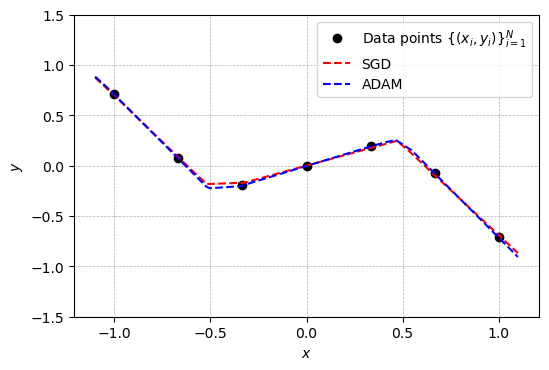

In [152]:
with torch.no_grad():
    x = np.linspace(-1.1, 1.1, num = 1000)
    torch_x = torch.tensor(x.reshape((1000,1)), dtype=torch.float32)
    y_pred_sgd = model_sgd(torch_x).numpy()
    y_pred_adam = model_adam(torch_x).numpy()

    fig, axes = plt.subplots(dpi=100)
    axes.plot(xs,ys,'ko')
    axes.plot(x, y_pred_sgd,'r--')
    axes.plot(x, y_pred_adam,'b--')
    axes.legend([r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$', r'SGD',r'ADAM' ])
    axes.set_xlabel('$x$')
    axes.set_ylabel('$y$')
    axes.grid(linestyle='dashed', linewidth=0.5)
    axes.set_ylim([-1.5, 1.5]);

    print("Traing loss: {:.5f}".format(loss_fn(model(torch_xs),torch_ys).item()))

__e)__ Fifth, we study the loss landscape of a trained network along different directions in parameter space.  


Train an overparameterized network with ReLU activation functions at each layer. Denote it by $m(\cdot,\theta^{*})$ where $\theta^{*}$ are the learned parameters. Sample $\Delta$, with the same size as $\theta^{*}$, from a standard normal distribution (and keep it fixed). Plot 

$$
\begin{align*}
    \frac{1}{N}\sum_{i=1}^N L\left(m\left(x_i;\theta^{*} + t \Delta\right),y_i\right)
\end{align*}
$$

as a function of $t\in[-1,1]$ (or even a larger interval). 

Do the same for another network with the same widths and depth, but using 4 * sigmoid activation functions at each layer. 

How does these two cases differ? Give a qualitative analysis. 

_Hints:_ You can get the parameters as a dictionary of a model by using `model.state_dict()`, updating the parameters in the dictionary, and then loading the updated parameters into the model using `model.load_state_dict(...)`. If you use this approach it is helpful to know the difference between [a shallow copy and a deep copy of a dictionary](https://thispointer.com/python-how-to-copy-a-dictionary-shallow-copy-vs-deep-copy/) You might need to cut off values of the loss that are too high to get a nice plot.

_Optional:_ Plot in two direction at the same time, i.e. plot 
$$
\begin{align*}
    \frac{1}{N}\sum_{i=1}^N L\left(m\left(x_i;\theta^{*} + t \Delta_{t} + s \Delta_{s}\right),y_i\right)
\end{align*}
$$

as a function of $t,s\in[-1,1]$. 

__Solution:__ 

As before, the ReLu tends to achieve a lower loss than the sigmoid. Both produce nice plots that hints that we actually have ended up in a local minimum. Maybe the ReLu landscape is more sharp than the sigmoid, it varies to a greater extent.

In [300]:
%%capture
# Write your code here
model = model_vanilla()
optimizer = optim.SGD(model.parameters(), lr=0.05)
loss_fn = nn.MSELoss()
train(model, data_loader)

model_s = model_sigmoid()
#optimizer = optim.Adam(model.parameters(), lr=0.1)
optimizer = optim.SGD(model_s.parameters(), lr=0.05)
loss_fn = nn.MSELoss()
train(model_s, data_loader)

models = [model, model_s]

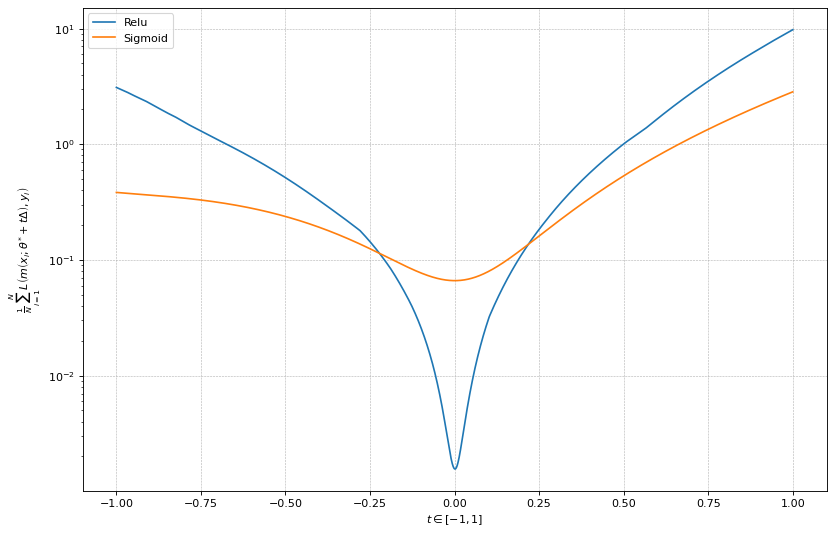

In [301]:
import copy
losses = []
for model in models:
    with torch.no_grad():
        loss_values = []
        torch_xs = torch.tensor(xs.reshape((N,1)), dtype=torch.float32)
        torch_ys = torch.tensor(ys.reshape((N,1)), dtype=torch.float32)

        original_params = copy.deepcopy(model.state_dict())
        Deltas = {k : np.random.standard_normal(size = v.shape) for k,v in original_params.items()}
        for t in np.linspace(-1,1, 10000):
            temp = {k : v + t * Deltas[k] for k,v in original_params.items()}
            model.load_state_dict(temp)
            pred = model(torch_xs)

            loss = loss_fn(pred , torch_ys)
            loss_values.append(loss.item())
    losses.append(loss_values)
fig = plt.figure(figsize=(12, 8), dpi=80)
plt.grid(linestyle='dashed', linewidth=0.5)
plt.semilogy(np.linspace(-1,1,10000),losses[0])
plt.semilogy(np.linspace(-1,1,10000),losses[1])
plt.ylabel(r'$\frac{1}{N}\sum_{i=1}^N L\left(m\left(x_i;\theta^{*} + t \Delta\right),y_i\right)$')
plt.xlabel(r'$t\in[-1,1]$')
plt.legend(['Relu', 'Sigmoid']);

---
### Exercise 4: Implicit regularization via small norm in polynomial fitting in $\mathbb{R}$
_Remark:_ You should solve this exercise using `numpy` primarily.

The purpose of this exercise is to study optimization problems in the overparameterized regime, i.e., when there are multiple solutions to choose from, and see how the norm of a given solution may affect generalization.   

Again, we consider the data points $\{(x_{i},y_{i})\}_{i=1}^{N}\subseteq\mathbb{R}\times\mathbb{R}$, where $N=7$, below:

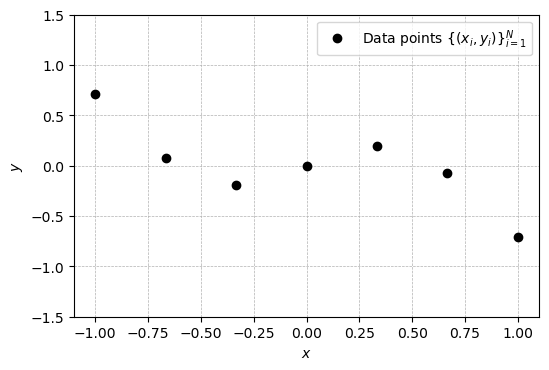

In [69]:
N = 7 # the number of data points
xs = np.linspace(-1, 1, num=N) # the x_i's
ys = np.sin(5*xs)*np.exp(np.abs(2*xs)) / 10 # the y_i's

fig, axes = plt.subplots(dpi=100)
axes.plot(xs,ys,'ko')
axes.legend([r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$'])
axes.set_xlabel('$x$')
axes.set_ylabel('$y$')
axes.grid(linestyle='dashed', linewidth=0.5)
axes.set_ylim([-1.5, 1.5]);

We wish to fit a polynomial model $m(\cdot;\theta)$ of degree $n=9$ (overparameterized) to the data points  $\{(x_{i},y_{i})\}_{i=1}^{N}$. One solution $m(\cdot;\theta^{*})$ is given below:

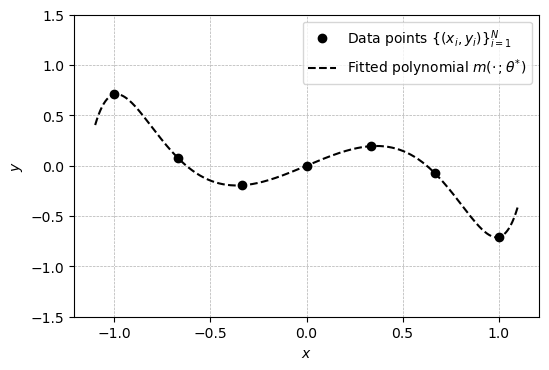

In [70]:
theta_star = np.array([0,  0.8, 0, -1.9, 0, -0.583957507, 0, 0.28, 0, 0.695322536])
x = np.linspace(-1.1, 1.1, num = 1000)

fig, axes = plt.subplots(dpi=100)
axes.plot(xs,ys,'ko')
axes.plot(x, np.polyval(np.flip(theta_star), x),'k--')
axes.legend([r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$', r'Fitted polynomial $m(\cdot\,;\theta^{*})$'])
axes.set_xlabel('$x$')
axes.set_ylabel('$y$')
axes.grid(linestyle='dashed', linewidth=0.5)
axes.set_ylim([-1.5, 1.5]);

---

__a)__ Recall from __Exercise 1__ __g)__ that given a candidate point $a\in\mathbb{R}^{n+1}$, we can obtain a solution via the Euclidean projection formula $\theta^{*} = a - X^{T}(XX^{T})^{-1}(Xa-Y)$. Initialize $a$ randomly and compute the projection $\theta^{*}$ and plot the fitted polynomial $m(\cdot;\theta^{*})$ as above. Vary the magnitude or norm of $\theta^{*}$ indirectly by multiplying $a$ by $0$, $10$, $100$ and $1000$. Visually, how does the generalization of $m(\cdot;\theta^{*})$ correspond to the norm of $\theta^{*}$?

__Solution:__ 

Generalization tends to worsen with increased norm. This makes intutive sense, with small changes in input a greater norm will more likely lead to big difference in output, than for a model with parameters with small norm. This since the difference in output is bounded by the difference in inputs multiplied with a lipsitch-like constant that is proportional to the norm of the weights


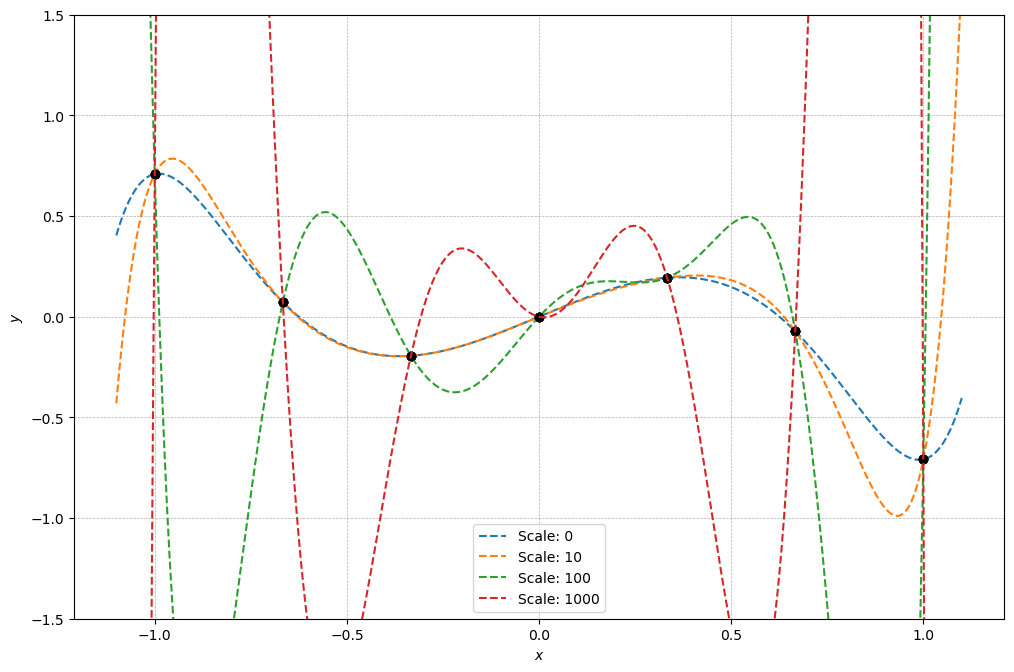

In [71]:
n = 9 # degree
a_ = [np.random.randn(n + 1) * scale for scale in [0, 10, 100, 1000]]
X = phi(xs, 9 + 1)
Y = ys

# Write your code here
theta_stars = [a - X.T @ np.linalg.inv(X @ X.T) @ (X @ a - Y) for a in a_]
fig, axes = plt.subplots(dpi=100, figsize=(12, 8))
for a,theta_star in zip([0, 10, 100, 1000], theta_stars):
    axes.plot(xs,ys,'ko')
    axes.plot(x, np.polyval(np.flip(theta_star), x),'--', label = f'Scale: {a}')
    #axes.legend([r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$', r'Fitted polynomial $m(\cdot\,;\theta^{*})$'])
    axes.legend()
    axes.set_xlabel('$x$')
    axes.set_ylabel('$y$')
    axes.grid(linestyle='dashed', linewidth=0.5)
    axes.set_ylim([-1.5, 1.5])

__b)__ Implement the GD method for optimization problem (2) in __Exercise 1__ above, starting at $\theta_{0}=0$, using step size $\gamma_{k} = 1/\beta$, and verify that the resulting sequence $\{\theta_{k}\}_{k\geq0}$ converges to $\theta^{*}$, where $\theta^{*}$ is the Euclidean projection starting from the candidate point $a=0$. I.e., the GD method converges to the solution with the smallest norm. Do this by plotting $||\theta_{k}-\theta^{*}||_{2}^{2}$ as a function of $k$ in log-linear scale.

_Remark:_ We consider $\theta_{k}$ to have converged to $\theta^{*}$ if $||\theta_{k}-\theta^{*}||_{2}^{2} \leq 10^{-16}$.


__Solution:__ 

It converges after circa 20 000 iterations.

In [286]:
# Write your code here
# Write your code here
# Write your code here
import numpy as np
import functools
from tqdm import tqdm
def phi(x, n):
    return np.array([x**k for k in range(0, n)]).T

def ols_loss(theta, X, Y, N):
    return 1/N * np.linalg.norm(X @ theta - Y, ord = 2) ** 2

def grad_ols_loss(theta, X, Y, N):
    return 2 / N * X.T @ (X @ theta - Y)

def get_beta(X, N):
    return 2 / N * np.linalg.norm(X.T @ X, ord = 2)

def gd(num_iters, theta_0, X, Y, gamma, N):
    theta = theta_0
    thetas = []
    for k in range(0, num_iters):
        thetas.append(theta)
        theta = theta - gamma * grad_ols_loss(theta, X, Y, N)
    return thetas

def get_gamma(beta, gamma_type = None, k = 0):
    if gamma_type is None:
        return 0.1 / beta
    if gamma_type == 'decreasing':
        return 0.1 / beta / (k+1)
    if gamma_type == 'decreasing_floor':
        return 0.1 / beta / (np.floor(k/1000) + 1)
    return 1/beta

def gd(num_iters, theta_0, X, Y, gamma, N):
    theta = theta_0
    thetas = []
    for k in tqdm(range(0, num_iters)):
        thetas.append(theta)
        theta = theta - gamma * grad_ols_loss(theta, X, Y, N)
    return thetas

def get_theta_opt(a,X, Y):
    return a - X.T @ np.linalg.inv(X @ X.T) @ (X @ a - Y)

In [287]:
#Solve
n = 9 
X = phi(xs, n + 1)
N = xs.shape[0]
a = np.zeros(X.shape[1])
Y = ys
theta_0 = np.zeros(X.shape[1])
beta = get_beta(X, N)
gamma = get_gamma(beta, gamma_type = None, k = 0)
num_iters = int(N*1e5)


thetas = gd(num_iters, theta_0, X, Y, gamma, N)
theta_star = get_theta_opt(a,X, Y)

100%|██████████| 700000/700000 [00:09<00:00, 73268.40it/s]


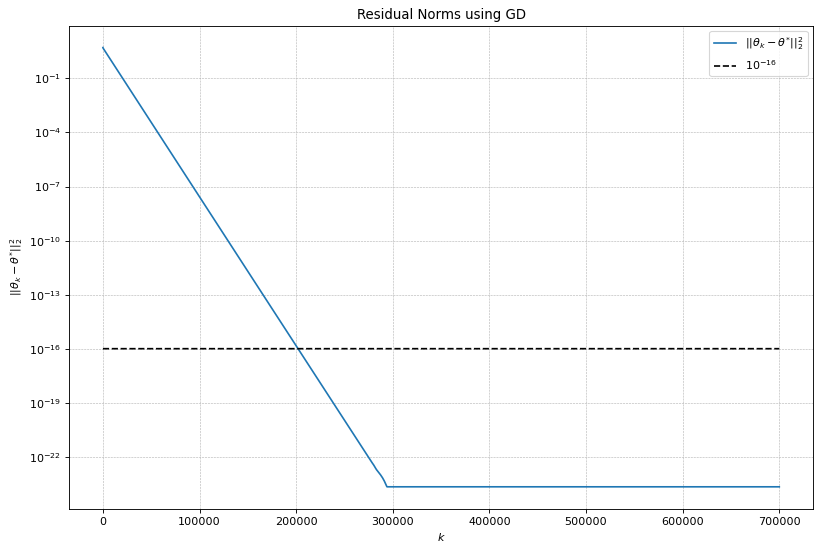

In [289]:
#plot
fig = plt.figure(figsize=(12, 8), dpi=80)
plt.grid(linestyle='dashed', linewidth=0.5)
plt.semilogy([np.linalg.norm(theta - theta_star)**2 for theta in thetas])
plt.semilogy([1e-16 for _ in thetas],'k--')
plt.legend([r'$||\theta_{k}-\theta^{*}||_{2}^{2}$', r'$10^{-16}$'])
plt.ylabel(r'$||\theta_{k}-\theta^{*}||_{2}^{2}$')
plt.xlabel('$k$');
plt.title('Residual Norms using GD');

---

__c)__ Implement the SGD method for optimization problem (1) in __Exercise 1__ above, starting at $\theta_{0}=0$, using step size $\gamma_{k} = 0.1 / \beta$, and verify that the resulting sequence $\{\theta_{k}\}_{k\geq0}$ converges to $\theta^{*}$, where $\theta^{*}$ is the Euclidean projection starting from the candidate point $a=0$. I.e., the SGD method converges to the solution with the smallest norm. Do this by plotting $||\theta_{k}-\theta^{*}||_{2}^{2}$ as a function of $k$ in log-linear scale.


__Solution:__ 


Yes, it converges but after a large number of iterations: circa $2 * 10^{6}$. Which is circa 100 times more than the method above.

In [266]:
# Write your code here
# Write your code here
# Write your code here
import numpy as np
import functools
from tqdm import tqdm

def grad_ols_loss_i(x_i, y_i, theta):
    return 2 * (x_i @ theta - y_i) * x_i 

def get_beta(X, N):
    return 2 / N * np.linalg.norm(X.T @ X, ord = 2)

def get_gamma(beta, gamma_type = None, k = 0):
    if gamma_type is None:
        return 0.1 / beta
    if gamma_type == 'decreasing':
        return 0.1 / beta / (k+1)
    if gamma_type == 'decreasing_floor':
        return 0.1 / beta / (np.floor(k/1000) + 1)
    return 1/beta

def SGD(num_iters, theta_0, X, Y, N, beta, gamma_type = None):
    theta = theta_0
    thetas = []
    for k in tqdm(range(0, num_iters)):
        thetas.append(theta)
        gamma = get_gamma(beta, gamma_type = gamma_type, k = k)
        rand_index = np.random.randint(low = 0, high = N, size = None)
        x_i, y_i = X[rand_index], Y[rand_index]
        theta = theta - gamma * grad_ols_loss_i(x_i, y_i, theta)
    return thetas

In [268]:
#Solve
n = 9
X = phi(xs, n + 1)
a = np.zeros(X.shape[1])
Y = ys
theta_0 = np.zeros(X.shape[1])
beta = get_beta(X, N)
gamma = get_gamma(beta, gamma_type = None, k = 0)
num_iters = int(N*1e6)
thetas = SGD(num_iters, theta_0, X, Y, N, beta, gamma_type = None)
theta_star = get_theta_opt(a,X, Y)

100%|██████████| 7000000/7000000 [02:38<00:00, 44118.88it/s]


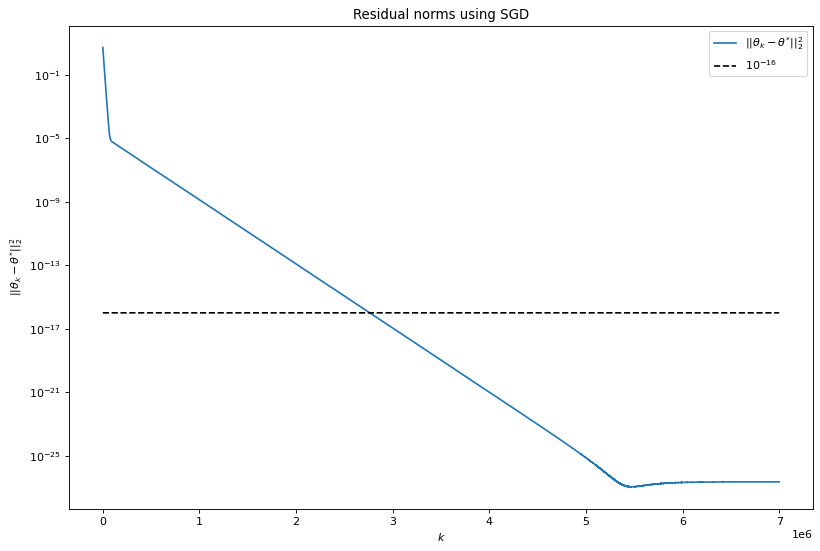

In [269]:
fig = plt.figure(figsize=(12, 8), dpi=80)
plt.semilogy([np.linalg.norm(theta - theta_star)**2 for theta in thetas])
plt.semilogy([1e-16 for _ in thetas], 'k--')
plt.legend([r'$||\theta_{k}-\theta^{*}||_{2}^{2}$', r'$10^{-16}$'])
plt.ylabel(r'$||\theta_{k}-\theta^{*}||_{2}^{2}$')
plt.xlabel('$k$');
plt.title('Residual norms using SGD');

---

__d)__ The ADAM optimization method is given by:

- Pick $\theta_{0}\in\mathbb{R}^{n+1}$, $\hat{m}_{0}=\hat{v}_{0}=0\in\mathbb{R}^{n+1}$, $b_{m},b_{v}\in(0,1)$ and $\gamma,\epsilon>0$.
- For $k\geq 0$:
    - Pick $i\in\{1,\ldots, N\}$ uniformly at random
    - Set $g_{k+1} = \nabla f_{i}(\theta_{k})$
    - Set $\hat{m}_{k+1} = b_{m}\hat{m}_{k}+(1-b_{m})g_{k+1}$
    - Set $\hat{v}_{k+1} = b_{v}\hat{v}_{k}+(1-b_{v})g_{k+1}^{2}$ (element-wise square)
    - Set $m_{k+1}=\hat{m}_{k+1}/(1-b_{m}^{k+1})$
    - Set $v_{k+1}=\hat{v}_{k+1}/(1-b_{v}^{k+1})$
    - Set $\theta_{k+1} = \theta_{k} - \gamma m_{k+1} ./ (\sqrt{v_{k+1}} + \epsilon\mathbb{1})$ (element-wise division and square root)

Use the [suggested values](https://arxiv.org/pdf/1412.6980.pdf):

- $b_{m} = 0.9$
- $b_{v} = 0.999$
- $\gamma = 0.001$
- $\epsilon = 10^{-8}$

Implement the ADAM optimization method for optimization problem (1) in __Exercise 1__ above, starting at $\theta_{0}=0$. Does ADAM converge to the minimum norm solution? Plot the resulting model.

__Solution:__ 


No, it does not converge. The distance to the solution seems to get stuck at circa 0.1. Resulting fit looks ok though.

In [272]:
# Write your code here
# Write your code here
# Write your code here
# Write your code here
import numpy as np

def ADAM(num_iters, theta_0, X, Y, N, gamma, b_m, b_v, epsilon):
    theta = theta_0
    m_hat = np.zeros(theta.shape)
    v_hat = np.zeros(theta.shape)
    thetas = []
    for k in tqdm(range(0, num_iters)):
        thetas.append(theta)
        rand_index = np.random.randint(low = 0, high = N, size = None)
        x_i, y_i = X[rand_index], Y[rand_index]
        g = grad_ols_loss_i(x_i, y_i, theta)
        m_hat = b_m * m_hat + (1 - b_m) * g
        v_hat = b_v * v_hat + (1 - b_v) * g**2
        m = m_hat / (1 - b_m**(k+1))
        v = v_hat / (1 - b_v**(k+1))
        theta = theta - gamma * m / (np.sqrt(v) + epsilon * np.ones(theta.shape))
        thetas.append(theta)
        
    return thetas

In [292]:
n = 9 # degree
num_iters = int(N*1e5)
X = phi(xs, n + 1)
a = np.zeros(X.shape[1])
Y = ys
theta_0 = np.zeros(X.shape[1])


gamma = 0.001
b_m = 0.9
b_v = 0.999
epsilon = 1e-8


thetas = ADAM(num_iters, theta_0, X, Y, N, gamma, b_m, b_v, epsilon)
theta_star = get_theta_opt(a,X, Y)

100%|██████████| 700000/700000 [00:44<00:00, 15743.87it/s]


Text(0.5, 1.0, 'Residual norms using ADAM')

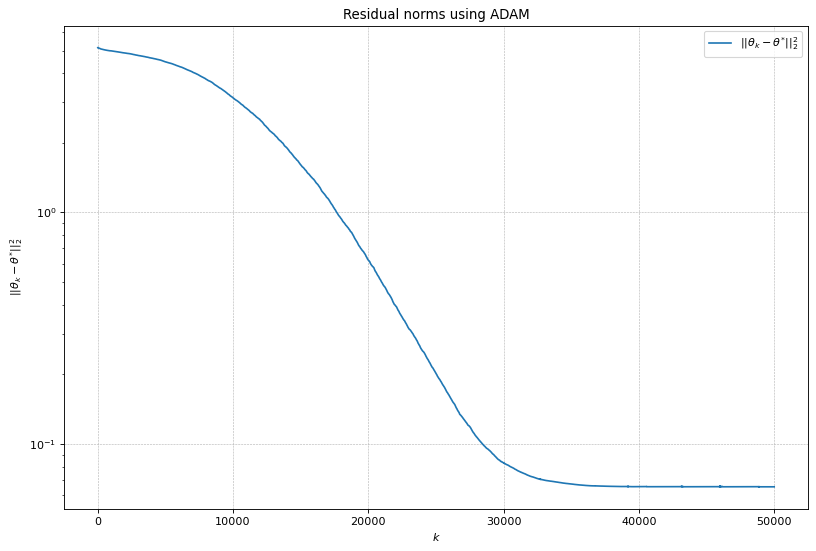

In [302]:
fig = plt.figure(figsize=(12, 8), dpi=80)
plt.grid(linestyle='dashed', linewidth=0.5)
plt.semilogy([np.linalg.norm(theta - theta_star)**2 for theta in thetas[0:50000]])
#plt.semilogy([1e-16 for _ in thetas], color = 'black')
plt.legend([r'$||\theta_{k}-\theta^{*}||_{2}^{2}$', r'$10^{-16}$'])
plt.ylabel(r'$||\theta_{k}-\theta^{*}||_{2}^{2}$')
plt.xlabel('$k$');
plt.title('Residual norms using ADAM');

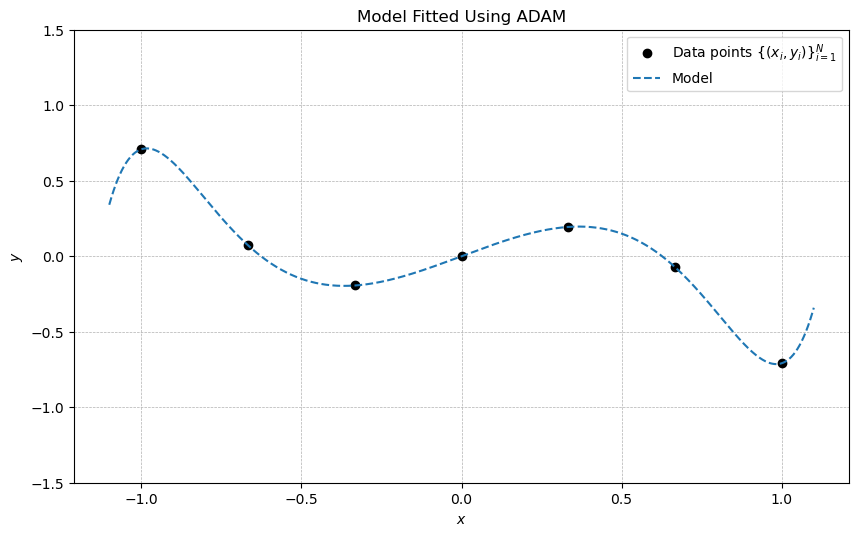

In [303]:
thetas_optim = thetas[-1]
x = np.linspace(-1.1, 1.1, num = 1000)
fig, axes = plt.subplots(dpi=100, figsize=(10, 6))
axes.plot(xs,ys,'ko')
axes.plot(x, np.polyval(np.flip(thetas_optim), x),'--')
axes.legend([r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$', r'Model', r'Optimal Model'])
axes.set_xlabel('$x$')
axes.set_ylabel('$y$')
axes.grid(linestyle='dashed', linewidth=0.5)
axes.set_ylim([-1.5, 1.5])
axes.set_title('Model Fitted Using ADAM');

---

__e)__ The ADAM optimization method scales the gradient independently in each coordinate. We call such methods diagonally scaled methods. 

Now, recall the scaled projection problem from __Exercise 1__ __g)__ above: given a candidate point $a\in\mathbb{R}^{n+1}$, we can obtain a solution via the scaled projection formula $\theta^{*} = a - H^{-1}X^{T}(X H^{-1} X^{T})^{-1}(Xa-Y)$.


Consider the candidate point $a\in\mathbb{R}^{n+1}$ and the highly skewed diagonal scaling matrix $H\in\mathbb{S}^{n+1}_{++}$ below:

In [276]:
a = np.zeros(n + 1)
H_inv = np.diag(np.logspace(-10, 10, num = n + 1)) # the inverse of H
def get_theta_opt_scaled(a,H_inv,X, Y):
    return a - H_inv @ X.T @ np.linalg.inv(X @ H_inv @ X.T) @ (X @ a - Y)

Plot the data points $\{(x_{i},y_{i})\}_{i=1}^{N}$ and the fitted polynomial $m(\cdot;\theta^{*})$ in the same figure using the scaled projection formula. Visually, does the fitted polynomial $m(\cdot;\theta^{*})$ seem to generalize well?

__Solution:__ 

It does not seem to generalize well. For example, it predicts values very far away from interpolating linear lines between the points.

Text(0.5, 1.0, 'Fitted model using parameters from scaled projection formula')

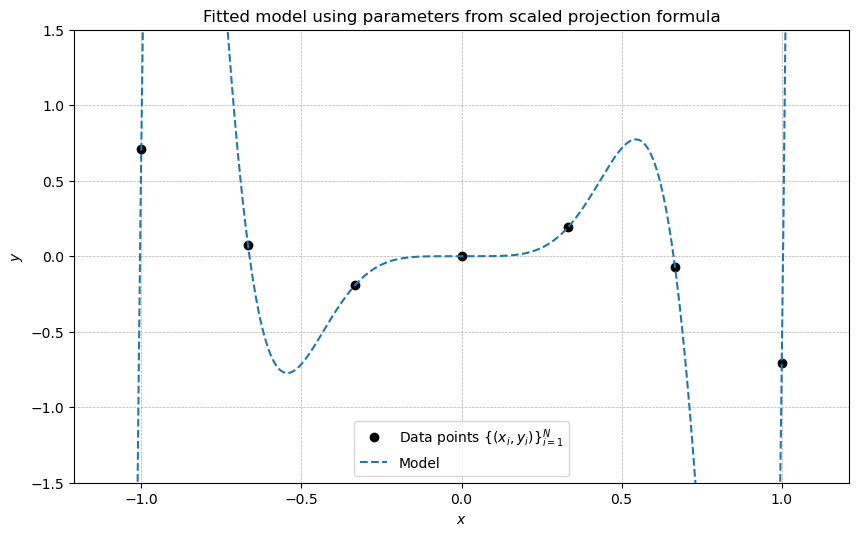

In [277]:
# Write your code here
theta_star = get_theta_opt_scaled(a,H_inv,X, Y)
x = np.linspace(-1.1, 1.1, num = 1000)
fig, axes = plt.subplots(figsize=(10, 6), dpi=100)
axes.plot(xs,ys,'ko')
axes.plot(x, np.polyval(np.flip(theta_star), x),'--')
axes.legend([r'Data points $\{(x_{i},y_{i})\}_{i=1}^{N}$', r'Model', r'Optimal Model'])
axes.set_xlabel('$x$')
axes.set_ylabel('$y$')
axes.grid(linestyle='dashed', linewidth=0.5)
axes.set_ylim([-1.5, 1.5]);
axes.set_title('Fitted model using parameters from scaled projection formula')

---

__f)__ The scaled GD method is given by
- Pick $\theta_{0}\in\mathbb{R}^{n+1}$ and $H\in\mathbb{S}_{+}^{n+1}$
- For $k\geq 0$:
    - Set $\theta_{k+1} = \theta_{k} - \gamma_{k} H^{-1}\nabla f(\theta_{k})$ for some $\gamma_{k}>0$.

For numerical reasons (i.e., so that the algorithm converges in reasonable time), consider the less skewed diagonal scaling matrix below:

In [282]:
H_inv = np.diag(np.logspace(-3, 0, num = n + 1)) # the inverse of H

Starting at $\theta_{0}=0$ and using the step size $\gamma_{k}=1/\beta_{H}$, show that the scaled GD method converges to the scaled projection point $\theta^{*}=a - H^{-1}X^{T}(X H^{-1} X^{T})^{-1}(Xa-Y)$ for $a=0$.

Here, $\beta_{H}$ is given by

\begin{align}
    \beta_{H} = \frac{2}{N}\left\lVert H^{-\frac{1}{2}}X^{T}X H^{-\frac{1}{2}} \right\rVert_{2},
\end{align}

where $H^{-\frac{1}{2}}$ is the symmetric square root of $H^{-1}$.

__Solution:__ 

The solutio converges to $\theta^*$ after roughly 3e5 iterations as shown below.

In [283]:
# Write your code here
from scipy.linalg import sqrtm
def get_beta_scaled(H_inv,X, N):
    return 2 / N * np.linalg.norm(np.sqrt(H_inv) @ X.T @ X @ np.sqrt(H_inv))

def scaled_gd(num_iters, theta_0, X, Y, gamma, H_inv, N):
    theta = theta_0
    thetas = [theta]
    for k in tqdm(range(0, num_iters)):
        theta = theta - gamma * H_inv @ grad_ols_loss(theta, X, Y, N)
        thetas.append(theta)
    return thetas



In [284]:
n = 9 # degree
num_iters = int(N*1e5)
X = phi(xs, n + 1)
a = np.zeros(X.shape[1])
Y = ys
theta_0 = np.zeros(X.shape[1])

gamma = 1 / get_beta_scaled(H_inv,X, N)

thetas = scaled_gd(num_iters, theta_0, X, Y, gamma, H_inv, N)
theta_star = get_theta_opt_scaled(a,H_inv,X, Y)

100%|██████████| 700000/700000 [00:13<00:00, 53831.96it/s]


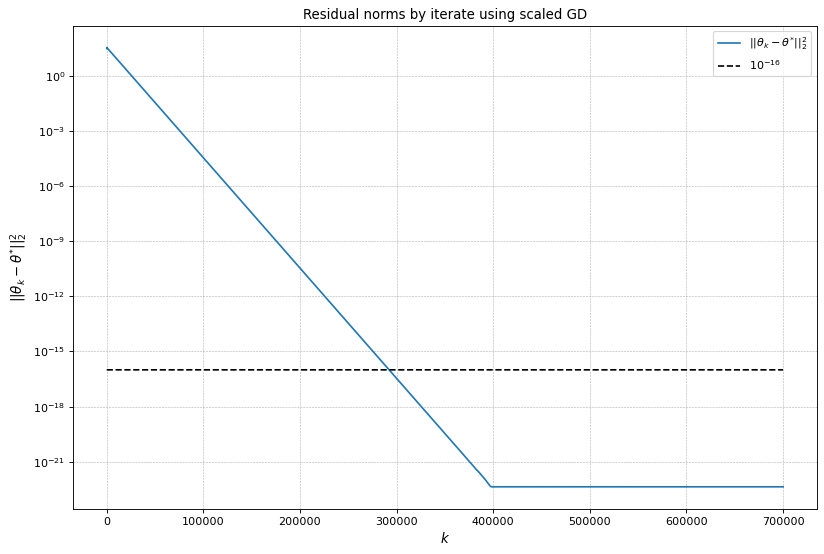

In [285]:
fig = plt.figure(figsize=(12, 8), dpi=80)
plt.grid(linestyle='dashed', linewidth=0.5)
plt.semilogy([np.linalg.norm(theta - theta_star)**2 for theta in thetas])
plt.semilogy([1e-16 for _ in thetas],'k--')
plt.legend([r'$||\theta_{k}-\theta^{*}||_{2}^{2}$', r'$10^{-16}$'])
plt.ylabel(r'$||\theta_{k}-\theta^{*}||_{2}^{2}$', size = 12)
plt.xlabel('$k$', size = 12)
plt.title('Residual norms by iterate using scaled GD');


---
### Exercise 5: Implicit regularization via flatness
_Remark:_ You should solve this exercise using `numpy` primarily.

It has been observed in the [literature](https://arxiv.org/pdf/1609.04836.pdf) that flat mimima tend to lead to better generalization than sharp minima. In this exercise, we empirically verfiy that SGD tends to favour flat mimima.

Consider the finite-sum problem problem
$$
\begin{equation}
\begin{aligned}
& \underset{x\in\mathbb{R}}{\mathrm{minimize}}
& & f(x)= \frac{1}{N} \sum_{i=1}^{N}f_{i}(x)
\end{aligned}
\end{equation}
$$
where the $f_{i}$'s and $f$ are given below: (the derivatives are also given for convenience.)

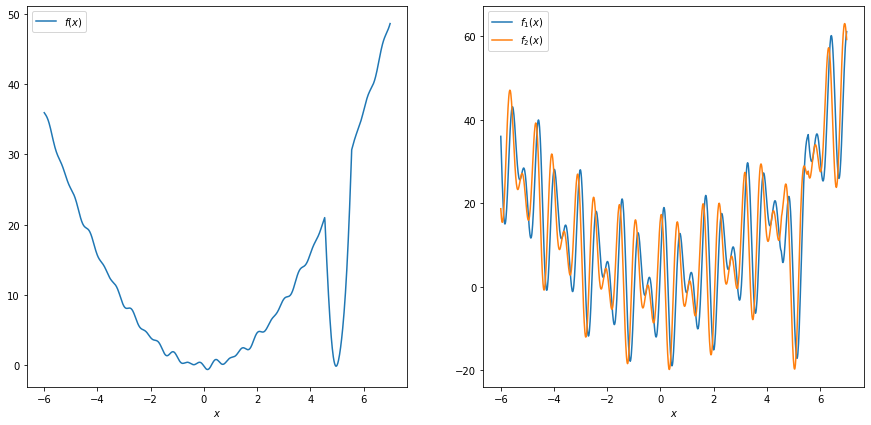

In [221]:
from functools import partial

def loss_term(phase, x):
    if x < 50/11:
        value = x**2
    elif x < 50/9:
        value = 100*(x - 5)**2
    else:
        value = x**2
    return value + 20*np.sin(10*x + phase)*np.cos(2*(x - 5))

def derivative_of_loss_term(phase, x):
    if x < 50/11:
        value = 2*x
    elif x < 50/9:
        value = 200*(x - 5)
    else:
        value = 2*x
    return value + 20*(10*np.cos(10*x + phase)*np.cos(2*(x - 5)) - 2*np.sin(10*x + phase)*np.sin(2*(x - 5)))

N = 2000 # the number of summands
np.random.seed(0)
phases = 2 * np.pi * np.random.rand(N)

# The induvidual summands f_i as a list
f_i_s = list(map(lambda phase : np.vectorize(partial(loss_term, phase)), phases))

# The function f
f = np.vectorize(lambda x : np.mean([f_i(x) for f_i in f_i_s]))

# Derivatives are provided for convenience
derivative_f_i_s = list(map(lambda phase : np.vectorize(partial(derivative_of_loss_term, phase)), phases))
derivative_f = np.vectorize(lambda x : np.mean([d_f_i(x) for d_f_i in derivative_f_i_s]))

x = np.linspace(-6, 7, num=1000)
y_1 = f_i_s[0](x)
y_2 = f_i_s[1](x)
y = f(x)

fig, axes = plt.subplots(1, 2, figsize=(15,7))
axes[0].plot(x, y)
axes[0].legend(["$f(x)$"])
axes[0].set_xlabel('$x$')
axes[1].plot(x, y_1)
axes[1].plot(x, y_2)
axes[1].legend(["$f_{1}(x)$", "$f_{2}(x)$"])
axes[1].set_xlabel('$x$');

Note that the function $f$ has a flat minimum close to $0$ and a sharp minimum close to $5$. Implement both GD and SGD for this problem: 

- Start at $x_{0}=5$, i.e., close to the sharp minimum. 
- Let both GD and SGD go for $2000$ iterations.
- Use the same constant step size $\gamma_{k} = 0.001$ for SGD and GD. 
- You should notice that SDG manages to escape the sharp minimum and find the flat minimum (most of the time), while GD does not. Illustrate this by plotting $x_{k}$ as a function of $k$ for both methods.  (Common mistake: We are not asking for $f(x_k)$ vs $x_k$.)

Give some brief comments.

__Solution:__

The SGD tends to escape the sharp minimum after some time while the gradient descent does not. This corresponds well with what we have discussed in class. The SGD could also go back to the sharp minimum, this is however probably less likely than going from sharp to flat, depending on the function at hand.

In [232]:
# Write your code here

def GD_2(num_iters, x_0, gamma):
    x = x_0
    xs = [x_0]
    for k in tqdm(range(0, num_iters)):
        x = x - gamma * derivative_f(x)
        xs.append(x)
    return xs

def SGD_2(num_iters, x_0, gamma, N):
    x = x_0
    xs = [x_0]
    for k in tqdm(range(0, num_iters)):
        rand_index = np.random.randint(low = 0, high = N, size = None)
        x = x - gamma * derivative_f_i_s[rand_index](x)
        xs.append(x)
    return xs




In [236]:
x_0 = 5
gamma = 0.001
num_iters = int(2e3)
xs_gd = GD_2(num_iters, x_0, gamma)
xs_sgd = SGD_2(num_iters, x_0, gamma, N)

ERROR! Session/line number was not unique in database. History logging moved to new session 303


100%|██████████| 2000/2000 [00:00<00:00, 15091.96it/s]


Text(0.5, 1.0, '$x_k$ Using different optimizers')

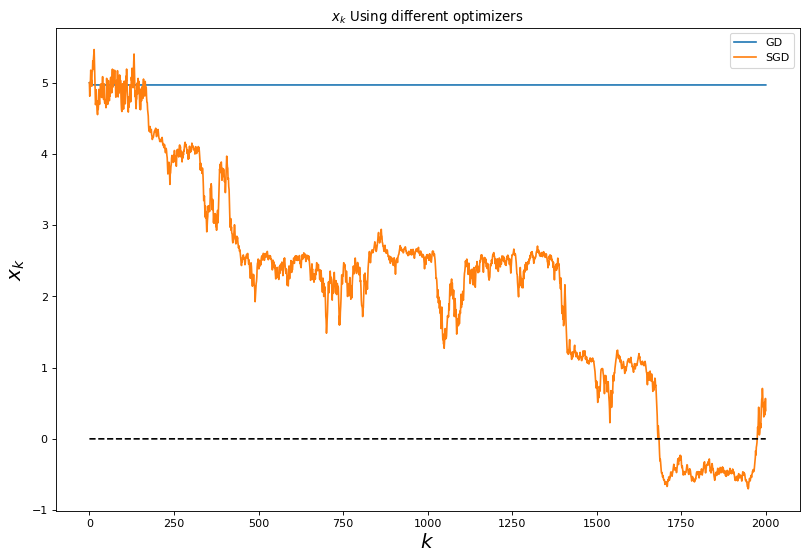

In [244]:
fig = plt.figure(figsize=(12, 8), dpi=80)
plt.plot(xs_gd, label = 'GD')
plt.plot(xs_sgd, label = 'SGD')
plt.plot([0 for _ in xs_gd], 'k--')
plt.legend()
plt.ylabel(r'$x_k$', size = 18)
plt.xlabel(r'$k$', size = 18);
plt.title('$x_k$ Using different optimizers')
